# Pandas(Дж_Вандер_Плас)

В предыдущей главе мы рассмотрели библиотеку NumPy и ее объект ndarray, обеспечивающий эффективное хранение плотных массивов и манипуляции над ними
в Python. 

В этой главе мы, основываясь на этих знаниях, детально ознакомимся со
структурами данных библиотеки Pandas.

Pandas — более новый пакет, надстройка над библиотекой NumPy, обеспечивающий
эффективную реализацию класса DataFrame. 

Объекты DataFrame — многомерные массивы с метками для строк и столбцов, а также зачастую с неоднородным типом данных и/или пропущенными данными. 

Помимо удобного интерфейса для хранения маркированных данных, библиотека Pandas реализует множество операций для работы с данными хорошо знакомых пользователям фреймворков баз данных и электронных таблиц.

Структура данных ndarray библиотеки NumPy предоставляет все необходимые
возможности для работы с хорошо упорядоченными данными в задачах численных
вычислений. 

Для этой цели библиотека NumPy отлично подходит, однако имеет свои ограничения, которые становятся заметными, чуть только нам потребуется немного больше гибкости (маркирование данных, работа с пропущенными данными
и т. д.). 

Эти ограничения проявляются также при попытках выполнения операций, неподходящих для поэлементного транслирования (группировки, создание
сводных таблиц и т. д.). 

Такие операции являются важной частью анализа данных с меньшей степенью структурированности, содержащихся во многих формах окружающего мира. 

Библиотека Pandas, особенно ее объекты Series и DataFrame,
основана на структурах массивов библиотеки NumPy и обеспечивает эффективную
работу над подобными задачами «очистки данных».

В этой главе мы сосредоточимся на стандартных приемах использования объектов
Series, DataFrame и связанных с ними структур. 

По мере возможности мы будем применять взятые из реальных наборов данных примеры, но они не являются нашей целью.

# Установка и использование библиотеки Pandas

Для установки пакета Pandas необходимо наличие в вашей системе пакета NumPy, а если вы выполняете сборку библиотеки из исходного кода, то и соответствующих утилит для компиляции исходных кодов на языках С и Cython, из которых состоит Pandas. 

Подробные инструкции по установке можно найти
в документации пакета Pandas (http://pandas.pydata.org/). 

Если же вы последовали совету из предисловия и воспользовались стеком Anaconda, то пакет Pandas
у вас уже имеется.

После установки пакета Pandas можно импортировать его и проверить версию:

In [2]:
import pandas
pandas.__version__

'0.24.1'

Аналогично тому, как мы импортировали пакет NumPy под псевдонимом np, пакет Pandas импортируем под псевдонимом pd:

In [3]:
import pandas as pd

Мы будем использовать эти условные обозначения для импорта далее в книге.

# Знакомство с объектами библиотеки Pandas

На самом примитивном уровне объекты библиотеки Pandas можно считать расширенной версией структурированных массивов библиотеки NumPy, в которых строки и столбцы идентифицируются метками, а не простыми числовыми индексами. 

Библиотека Pandas предоставляет множество полезных утилит, методов и функциональности в дополнение к базовым структурам данных, но все последующее изложение потребует понимания этих базовых структур. 

Позвольте познакомить вас с тремя фундаментальными структурами данных библиотеки

Pandas: классами Series, DataFrame и Index.

Начнем наш сеанс программирования с обычных импортов библиотек NumPy и Pandas:

In [1]:
import numpy as np
import pandas as pd

# Объект Series библиотеки Pandas

Объект Series библиотеки Pandas — одномерный массив индексированных данных. 

Его можно создать из списка или массива следующим образом:

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

Как мы видели из предыдущего результата, объект Series служит адаптером как для последовательности значений, так и последовательности индексов, к которым можно получить доступ посредством атрибутов values и index. 

Атрибут values представляет собой уже знакомый нам массив NumPy:

In [3]:
 data.values

array([0.25, 0.5 , 0.75, 1.  ])

index — массивоподобный объект типа pd.Index, который мы рассмотрим подробнее далее:

In [4]:
 data.index

RangeIndex(start=0, stop=4, step=1)

Аналогично массивам библиотеки NumPy, к данным можно обращаться по соответствующему им индексу посредством нотации с использованием квадратных
скобок языка Python:

In [5]:
 data[1]

0.5

In [6]:
 data[1:3]

1    0.50
2    0.75
dtype: float64

Однако объект Series библиотеки Pandas намного универсальнее и гибче, чем эмулируемый им одномерный массив библиотеки NumPy.

# Объект Series как обобщенный массив NumPy

Может показаться, что объект Series и одномерный массив библиотеки NumPy взаимозаменяемы. 

Основное различие между ними — индекс. 

В то время как индекс массива NumPy, используемый для доступа к значениям, — целочисленный и описывается неявно, индекс объекта Series библиотеки Pandas описывается явно и связывается со значениями.

Явное описание индекса расширяет возможности объекта Series. 

Такой индекс не должен(не обязан)  быть целым числом, а может состоять из значений любого нужного типа.

Например, при желании мы можем использовать в качестве индекса строковые значения:

In [11]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], 
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

При этом доступ к элементам работает обычным образом:

In [12]:
 data['b']

0.5

Можно применять даже индексы, состоящие из несмежных или непоследовательных значений:

In [13]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], 
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [14]:
data[4]

KeyError: 4

In [15]:
data[3]

0.75

# Объект Series как специализированный словарь

Объект Series библиотеки Pandas можно рассматривать как специализированную разновидность словаря языка Python. 

Словарь — структура, задающая соответствие
произвольных ключей набору произвольных значений, а объект Series — структура, задающая соответствие типизированных ключей набору типизированных
значений. 

Типизация важна: точно так же, как соответствующий типу специализированный код для массива библиотеки NumPy при выполнении определенных операций делает его эффективнее, чем стандартный список Python, информация
о типе в объекте Series библиотеки Pandas делает его намного более эффективным для определенных операций, чем словари Python.

Можно сделать аналогию «объект Series — словарь» еще более наглядной, сконструировав объект Series непосредственно из словаря Python:

In [16]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

По умолчанию при этом будет создан объект Series с полученным из отсортированных ключей индексом. 

Следовательно, для него возможен обычный доступ
к элементам, такой же, как для словаря:

In [17]:
population['California']

38332521

Однако, в отличие от словаря, объект Series поддерживает характерные для массивов операции, такие как срезы:

In [18]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

Мы рассмотрим некоторые нюансы индексации и срезов в библиотеке Pandas в разделе «Индексация и выборка данных» этой главы.

# Создание объектов Series

Мы уже изучили несколько способов создания объектов Series библиотеки Pandas с нуля. 

Все они представляют собой различные варианты следующего синтаксиса:

In [ ]:
pd.Series(data, index=index)

где index — необязательный аргумент, а data может быть одной из множества сущностей.

Например, аргумент data может быть списком или массивом NumPy. 

В этом случае index по умолчанию будет целочисленной последовательностью:

In [19]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

Аргумент data может быть скалярным значением, которое будет повторено нужное количество раз для заполнения заданного индекса:

In [20]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

Аргумент data может быть словарем, в котором index по умолчанию является отсортированными ключами этого словаря:

In [21]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

В каждом случае индекс можно указать вручную, если необходимо получить другой результат:


In [23]:
s = pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])
s[2]

'a'

In [26]:
s.index

Int64Index([3, 2], dtype='int64')

In [27]:
s.values

array(['c', 'a'], dtype=object)

In [24]:
s[3]

'c'

In [25]:
s[1]

KeyError: 1

Обратите внимание, что объект Series заполняется только заданными явным образом ключами.

# Объект DataFrame библиотеки Pandas

Следующая базовая структура библиотеки Pandas — объект DataFrame. 

Как и объект Series, обсуждавшийся в предыдущем разделе, объект DataFrame можно рассматривать или как обобщение массива NumPy, или как специализированную версию словаря Python. 

Изучим оба варианта.

### DataFrame как обобщенный массив NumPy

Если объект Series — аналог одномерного массива с гибкими индексами, объект DataFrame — аналог двумерного массива с гибкими индексами строк и гибкими именами столбцов. 

Аналогично тому, что двумерный массив можно рассматривать
как упорядоченную последовательность выровненных столбцов, объект DataFrame можно рассматривать как упорядоченную последовательность выровненных объектов Series. 

Под «выровненными» имеется в виду то, что они используют один и тот же индекс.

Чтобы продемонстрировать это, сначала создадим новый объект Series, содержащий площадь каждого из пяти упомянутых в предыдущем разделе штатов:

In [2]:
import pandas as pd
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

Воспользовавшись объектом population класса Series, сконструируем на основе словаря единый двумерный объект, содержащий всю эту информацию:

In [3]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [5]:
states = pd.DataFrame({'population': population, 'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Аналогично объекту Series у объекта DataFrame имеется атрибут index, обеспечивающий доступ к меткам индекса:

In [6]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Помимо этого, у объекта DataFrame есть атрибут columns, представляющий собой содержащий метки столбцов объект Index:

In [7]:
states.columns

Index(['population', 'area'], dtype='object')

Таким образом, объект DataFrame можно рассматривать как обобщение двумерного массива NumPy, где как у строк, так и у столбцов есть обобщенные индексы для доступа к данным.

# Объект DataFrame как специализированный словарь

DataFrame можно рассматривать как специализированный словарь. 

Если словарь задает соответствие ключей значениям, то DataFrame задает соответствие имени столбца объекту Series с данными этого столбца. 

Например, запрос данных по атрибуту 'area' приведет к тому, что будет возвращен объект Series, содержащий
уже виденные нами ранее площади штатов:

In [8]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Обратите внимание на возможный источник путаницы: в двумерном массиве NumPy data[0] возвращает первую строку.

По этой причине объекты DataFrame лучше рассматривать как обобщенные словари, а не обобщенные массивы, хотя обе
точки зрения имеют право на жизнь. 

Мы изучим более гибкие средства индексации
объектов DataFrame в разделе «Индексация и выборка данных» этой главы.

In [12]:
states['population']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

In [17]:
states.iloc[1]

population    26448193
area            695662
Name: Texas, dtype: int64

In [16]:
states.loc['Texas']

population    26448193
area            695662
Name: Texas, dtype: int64

# Создание объектов DataFrame

Существует множество способов создания объектов DataFrame библиотеки Pandas.

Вот несколько примеров.

Из одного объекта Series. 

Объект DataFrame — набор объектов Series. 

DataFrame, состоящий из одного столбца, можно создать на основе одного объекта Series:

In [18]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


Из списка словарей. Любой список словарей можно преобразовать в объект DataFrame. 

Мы воспользуемся простым списковым включением для создания данных:

In [19]:
data = [{'a': i, 'b': 2 * i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Даже если некоторые ключи в словаре отсутствуют, библиотека Pandas просто заполнит их значениями NaN (то есть Not a number — «не является числом»):

In [20]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


Из словаря объектов Series. 

Объект DataFrame также можно создать на основе словаря объектов Series:


In [21]:
pd.DataFrame({'population': population, 'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Из двумерного массива NumPy. 

Если у нас есть двумерный массив данных, мы можем создать объект DataFrame с любыми заданными именами столбцов и индексов. 

Для каждого из пропущенных значений будет использоваться целочисленный индекс:

In [24]:
import pandas as pd
import numpy as np
pd.DataFrame(np.random.rand(3, 2), columns=['foo', 'bar'], index=['a', 'b', 'c'])


,foo,bar
a,0.119198,0.000437
b,0.896583,0.279540
c,0.107528,0.323176


Из структурированного массива NumPy. 

Мы рассматривали структурированные массивы в разделе «Структурированные данные: структурированные массивы библиотеки NumPy» главы 2. 

Объект DataFrame библиотеки Pandas ведет себя во
многом аналогично структурированному массиву и может быть создан непосредственно из него:

In [26]:
C = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
C

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [27]:
pd.DataFrame(C)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


# Объект Index библиотеки Pandas

Как объект Series, так и объект DataFrame содержат явный индекс, обеспечивающий возможность ссылаться на данные и модифицировать их. 

Объект Index можно рассматривать или как неизменяемый массив (immutable array), или как упорядоченное множество (ordered set) (формально мультимножество, так как
объекты Index могут содержать повторяющиеся значения). 

Из этих способов его представления следуют некоторые интересные возможности операций над объектами Index. 

В качестве простого примера создадим Index из списка целых чисел:

In [29]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

# Объект Index как неизменяемый массив

Объект Index во многом ведет себя аналогично массиву. 

Например, для извлечения из него значений или срезов можно использовать стандартную нотацию индексации языка Python:

In [30]:
ind[1]

3

In [31]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

У объектов Index есть много атрибутов, знакомых нам по массивам NumPy:

In [32]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [33]:
ind.shape

(5,)

Одно из различий между объектами Index и массивами NumPy — неизменяемость индексов, то есть их нельзя модифицировать стандартными средствами:


In [34]:
ind[1] = 0

TypeError: Index does not support mutable operations

Неизменяемость делает безопаснее совместное использование индексов несколькими объектами DataFrame и массивами, исключая возможность побочных эффектов в виде случайной модификации индекса по неосторожности.

### Index как упорядоченное множество

Объекты библиотеки Pandas спроектированы с прицелом на упрощение таких операций, как соединения наборов данных, зависящие от многих аспектов арифметики множеств. 

Объект Index следует большинству соглашений, используемых встроенной структурой данных set языка Python, так что объединения, пересечения, разности и другие операции над множествами можно выполнять привычным образом:

In [35]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [36]:
indA & indB # пересечение

Int64Index([3, 5, 7], dtype='int64')

In [37]:
indA | indB # объединение

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [38]:
indA ^ indB # симметричная разность

Int64Index([1, 2, 9, 11], dtype='int64')

Эти операции можно выполнять также методами объектов, например indA.intersection(indB).

# Индексация и выборка данных

В главе 2 мы подробно рассмотрели методы и инструменты доступа, задания и изменения значений в массивах библиотеки NumPy: индексацию (arr[2, 1]), срезы
массивов (arr[:,1:5]), маскирование (arr[arr > 0]), «прихотливую» индексацию (arr[0,[1,5]]), а также их комбинации (arr[:,[1,5]]). 

Здесь мы изучим аналогичные средства доступа и изменения значений в объектах Series и DataFrame библиотеки Pandas. 

Если вы использовали паттерны библиотеки NumPy, то соответствующие паттерны библиотеки Pandas будут для вас привычны.

Начнем с простого случая одномерного объекта Series, после чего перейдем к более сложному двумерному объекту DataFrame.

# Выборка данных из объекта Series

Объект Series во многом ведет себя подобно одномерному массиву библиотеки NumPy и стандартному словарю языка Python. 

Это поможет нам лучше понимать паттерны индексации и выборки данных из этих массивов.

### Объект Series как словарь

Объект Series задает соответствие набора ключей набору значений аналогично словарю:

In [40]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [41]:
data['b']


0.5

Для просмотра ключей/индексов и значений выражения можно также использовать методы языка Python, аналогичные таковым для словарей:

In [42]:
'a' in data

True

In [43]:
data.keys()


Index(['a', 'b', 'c', 'd'], dtype='object')

In [44]:
data.index is data.keys()

True

In [45]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [46]:
data.items()

In [47]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

Объекты Series можно модифицировать с помощью синтаксиса, подобного синтаксису для словарей. 

Аналогично расширению словаря путем присваивания
значения для нового ключа можно расширить объект Series, присвоив значение для нового значения индекса:

In [49]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

Такая легкая изменяемость объектов — удобная возможность: библиотека Pandas сама, незаметно для нас, принимает решения о размещении в памяти и необходимости копирования данных. 

Пользователю, как правило, не приходится заботиться о подобных вопросах.

# Объект Series как одномерный массив


Объект Series, основываясь на интерфейсе, напоминающем словарь, предоставляет возможность выборки элементов с помощью тех же базовых механизмов, что и для массивов NumPy, то есть срезов, маскирования и «прихотливой» индексации.

Приведу несколько примеров:

In [51]:
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [50]:
# срез посредством явного индекса
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [52]:
# срез посредством неявного целочисленного индекса
data[0:2]


a    0.25
b    0.50
dtype: float64

In [53]:
# маскирование
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [54]:
# «прихотливая» индексация
data[['a', 'e']]


a    0.25
e    1.25
dtype: float64

Наибольшие затруднения среди них могут вызвать срезы. 

Обратите внимание, что при выполнении среза с помощью явного индекса (data['a':'c']) значение, соответствующее последнему индексу, включается в срез, а при срезе неявным индексом (data[0:2]) — не включается.

In [55]:
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [56]:
data[0:2]

a    0.25
b    0.50
dtype: float64

### Индексаторы: loc, iloc и ix

Подобные обозначения для срезов и индексации могут привести к путанице.

Например, при наличии у объекта Series явного целочисленного индекса операция индексации (data[1]) будет использовать явные индексы, а операция среза
(data[1:3]) — неявный индекс в стиле языка Python.

In [57]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [58]:
# Использование явного индекса при индексации
data[1]


'a'

In [59]:
# Использование неявного индекса при срезе
data[1:3]

3    b
5    c
dtype: object

Из-за этой потенциальной путаницы в случае целочисленных индексов в библиотеке Pandas предусмотрены специальные атрибуты-индексаторы, позволяющие явным образом применять определенные схемы индексации.

Они являются не функциональными методами, а именно атрибутами, предоставляющими для данных из объекта Series определенный интерфейс для выполнения срезов

Во-первых, атрибут loc позволяет выполнить индексацию и срезы с использованием явного индекса:

In [60]:
data.loc[1]

'a'

In [61]:
data.loc[1:3]


1    a
3    b
dtype: object

Атрибут iloc дает возможность выполнить индексацию и срезы, применяя неявный
индекс в стиле языка Python:


In [62]:
data.iloc[1]

'b'

In [63]:
data.iloc[1:3]

3    b
5    c
dtype: object

Третий атрибут-индексатор ix представляет собой гибрид первых двух и дляобъектов Series эквивалентен обычной индексации с помощью []. 

Назначение индексатора ix станет понятнее в контексте объектов DataFrame, которые мы рассмотрим далее.

Один из руководящих принципов написания кода на языке Python — «лучше явно,чем неявно». 

То, что атрибуты loc и iloc по своей природе явные, делает их очень удобными для обеспечения «чистоты» и удобочитаемости кода. 

Я рекомендую использовать оба, особенно в случае целочисленных индексов, чтобы сделать код более простым для чтения и понимания и избежать случайных малозаметных
ошибок при обозначении индексации и срезов.

# Выборка данных из объекта DataFrame

Объект DataFrame во многом ведет себя аналогично двумерному или структурированному массиву, а также словарю объектов Series с общим индексом. 

Эти аналогии следует иметь в виду во время изучения способов выборки данных изобъекта.

### Объект DataFrame как словарь

Первая аналогия, которую мы будем обсуждать, — объект DataFrame как словарь схожих между собой объектов Series.

Вернемся к примеру про площадь и численность населения штатов:

In [64]:
area = pd.Series({'California': 423967, 
                  'Texas': 695662,
                  'New York': 141297, 
                  'Florida': 170312,
                  'Illinois': 149995})

pop = pd.Series({'California': 38332521, 
                 'Texas': 26448193,
                 'New York': 19651127, 
                 'Florida': 19552860,
                 'Illinois': 12882135})

data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


К отдельным объектам Series, составляющим столбцы объекта DataFrame, можно обращаться посредством такой же индексации, как и для словарей, по имени столбца:

In [65]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Можно обращаться к данным и с помощью атрибутов, используя в их качестве строковые имена столбцов:

In [66]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

При доступе по имени атрибута-столбца фактически происходит обращение к тому же объекту, что и при словарном варианте доступа:


In [67]:
data.area is data['area']

True

Хотя это и удобное сокращенное написание, не забывайте, что оно работает не всегда! 

Например, если имена столбцов — не строки или имена столбцов конфликтуют с методами объекта DataFrame, доступ по именам атрибутов невозможен. 

Например, у объекта DataFrame есть метод pop(), так что выражение data.pop будет обозначать его, а не столбец "pop":

In [68]:
data.pop is data['pop']

False

Не поддавайтесь искушению присваивать значения столбцов посредством атрибутов. 

Лучше использовать выражение data['pop'] = z вместо data.pop = z.

Как и в случае с обсуждавшимися ранее объектами Series, такой «словарный» синтаксис можно применять для модификации объекта, например добавления еще одного столбца:

In [70]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Приведенный пример демонстрирует простоту синтаксиса поэлементных операций над объектами Series. 

Этот вопрос мы изучим подробнее в разделе «Операции над данными в библиотеке Pandas» текущей главы.


### Объект DataFrame как двумерный массив

Объект DataFrame можно рассматривать как двумерный массив с расширенными возможностями. 

Взглянем на исходный массив данных с помощью атрибута
values:

In [71]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

Мы можем выполнить множество привычных для массивов действий над объектом DataFrame. 

Например, транспонировать весь DataFrame, поменяв местами строки и столбцы:

In [72]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


Однако, когда речь заходит об индексации объектов DataFrame, становится ясно, что словарная индексация мешает нам рассматривать их просто как массивы
NumPy. 

В частности, указание отдельного индекса для массива означает доступ к строке:

In [73]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [74]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Таким образом, нам необходим еще один тип синтаксиса для индексации, аналогичной по стилю индексации массивов.

Библиотека Pandas применяет упомянутые
ранее индексаторы loc, iloc и ix. 

С помощью индексатора iloc можно индексировать исходный массив, как будто это простой массив NumPy (используя неявный синтаксис языка Python), но с сохранением в результирующих данных меток объекта DataFrame для индекса и столбцов:

In [75]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [76]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


Индексатор ix позволяет комбинировать эти два подхода:

In [77]:
data.ix[:3, :'pop']

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


Не забывайте, что в случае целочисленных индексов индексатор ix может быть источником тех же проблем, что и при целочисленной индексации объектов Series.

В этих индексаторах можно использовать все уже знакомые вам паттерны доступа к данным в стиле библиотеки NumPy.

Например, в индексаторе loc можно сочетать
маскирование и «прихотливую» индексацию:

In [79]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


Любой такой синтаксис индексации можно применять для задания или изменения значений. 

Это выполняется обычным, уже привычным вам по работе с библиотекой NumPy, способом:

In [81]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Чтобы достичь уверенности при манипуляции данными с помощью библиотеки Pandas, рекомендую потратить немного времени на эксперименты над простым объектом DataFrame и пробы типов индексации, срезов, маскирования и «прихотливой» индексации.

### Дополнительный синтаксис для индексации

Существует еще несколько вариантов синтаксиса для индексации, казалось бы, плохо согласующихся с обсуждавшимся ранее, но очень удобных на практике. 

Вопервых, если индексация относится к столбцам, срезы относятся к строкам:

In [82]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


При подобных срезах можно также ссылаться на строки по номеру, а не по индексу:

In [83]:
 data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


In [84]:
#так будет ошибка
data['Texas']

KeyError: 'Texas'

In [85]:
data['pop']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: pop, dtype: int64

In [86]:
data[:'Texas']

,area,pop,density
California,423967,38332521,90.00000
Texas,695662,26448193,38.01874


Непосредственные операции маскирования также интерпретируются построчно, а не по столбцам:

In [87]:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


Эти два варианта обозначений синтаксически подобны таковым для массивов библиотеки NumPy, и они, возможно, хоть и не вполне вписываются в шаблоны синтаксиса библиотеки Pandas, но весьма удобны на практике.

# Операции над данными в библиотеке Pandas

Одна из важнейших составляющих библиотеки NumPy — способность выполнять
быстрые поэлементные операции — как простейшие арифметические (сложение,
вычитание, умножение и т. д.), так и более сложные (тригонометрические, показательные и логарифмические функции и т. п.). 

Библиотека Pandas наследует от NumPy немалую часть этой функциональности, и ключ к ее использованию — универсальные функции, с которыми мы познакомились в разделе «Выполнение вычислений над массивами библиотеки NumPy: универсальные функции» главы 2.

Однако библиотека Pandas включает несколько полезных трюков: для унарных
операций, например изменения знака и тригонометрических функций, при использовании ее универсальных функций в выводе будут сохранены индекс и метки
столбцов, а для бинарных операций, например сложения и умножения, библиотека
Pandas будет автоматически выравнивать индексы при передаче объектов универсальной функции. 

Это значит, что сохранение контекста данных и объединение
данных из различных источников — две задачи, потенциально чреватые ошибками
при работе с исходными массивами библиотеки NumPy, — становятся надежно
защищенными от ошибок благодаря библиотеке Pandas. 

Кроме того, в библиотеке заданы операции между одномерными структурами объектов Series и двумерными структурами объектов DataFrame.

### Универсальные функции: сохранение индекса

В силу того что библиотека Pandas предназначена для работы с библиотекой NumPy, все универсальные функции библиотеки NumPy будут работать с объектами Series и DataFrame библиотеки Pandas. 

Начнем с описания простых объектов
Series и DataFrame для демонстрации этого:

In [1]:
import pandas as pd
import numpy as np

In [3]:
rng = np.random.RandomState(42)
rng

In [8]:
rng.randint(0, 10, 4)

array([3, 7, 7, 2])

In [4]:
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [9]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,5,4,1,7
1,5,1,4,0
2,9,5,8,0


Если применить универсальную функцию NumPy к любому из этих объектов, результатом будет другой объект библиотеки Pandas с сохранением индексов:

In [10]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

Или в случае немного более сложных вычислений:

In [11]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-0.707107,1.224647e-16,7.071068e-01,-0.707107
1,-0.707107,7.071068e-01,1.224647e-16,0.000000
2,0.707107,-7.071068e-01,-2.449294e-16,0.000000


Все описанные в разделе «Выполнение вычислений над массивами библиотеки NumPy: универсальные функции» главы 2 универсальные функции можно использовать аналогично вышеприведенным.

### Универсальные функции: выравнивание индексов

При бинарных операциях над двумя объектами Series или DataFrame библиотека Pandas будет выравнивать индексы в процессе выполнения операции. 

Это очень удобно при работе с неполными данными.

### Выравнивание индексов в объектах Series


Допустим, мы объединили два различных источника данных, чтобы найти три штата США с наибольшей площадью и три штата США с наибольшим количеством
населения:

In [12]:
area = pd.Series({'Alaska': 1723337, 
                  'Texas': 695662,
                  'California': 423967}, 
                 name='area')
population = pd.Series({'California': 38332521, 
                        'Texas': 26448193,
                        'New York': 19651127}, 
                       name='population')


Посмотрим, что получится, если разделить второй результат на первый для вычисления плотности населения:

In [13]:
 population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

Получившийся в итоге массив содержит объединение индексов двух исходных массивов, которое можно определить посредством стандартной арифметики множеств языка Python для этих индексов:

In [14]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

Ни один из относящихся к ним обоим элементов не содержит значения NaN («нечисловое значение»), с помощью которого библиотека Pandas отмечает пропущенные данные (см. дальнейшее обсуждение вопроса отсутствующих данных в разделе «Обработка отсутствующих данных» этой главы). 

Аналогичным образом реализовано сопоставление индексов для всех встроенных арифметических выражений языка Python: все отсутствующие значения заполняются по умолчанию значением NaN:

In [15]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

Если использование значений NaN нежелательно, можно заменить заполняющее значение другим, воспользовавшись соответствующими методами объекта вместо операторов. 

Например, вызов метода A.add(B) эквивалентен вызову A + B, но предоставляет возможность по желанию задать явным образом значения заполнителей для любых потенциально отсутствующих элементов в объектах A или B:

In [16]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### Выравнивание индексов в объектах DataFrame

При выполнении операций над объектами DataFrame происходит аналогичное выравнивание как для столбцов, так и для индексов:

In [21]:
AB = pd.DataFrame(rng.randint(0, 20, (2, 2)), 
                 columns=list('AB'))
AB

,A,B
0,8,6
1,17,3


In [22]:
BAC = pd.DataFrame(rng.randint(0, 10, (3, 3)), 
                 columns=list('BAC'))
BAC

,B,A,C
0,8,1,9
1,8,9,4
2,1,3,6


In [23]:
AB + BAC

,A,B,C
0,9.0,14.0,NaN
1,26.0,11.0,NaN
2,NaN,NaN,NaN


Обратите внимание, что индексы выравниваются правильно независимо от их расположения в двух объектах и индексы в полученном результате отсортированы. 

Как и в случае объектов Series, можно использовать соответствующие арифметические
методы объектов и передавать для использования вместо отсутствующих значений любое нужное значение fill_value. 

В следующем примере мы заполним отсутствующие значения средним значением всех элементов объекта A (которое вычислим, выстроив сначала значения объекта A в один столбец с помощью функции stack1
):

In [27]:
AB.stack()

0  A     8
   B     6
1  A    17
   B     3
dtype: int32

In [26]:
fill = AB.stack().mean()
fill

8.5

In [24]:
fill = AB.stack().mean()
AB.add(BAC, fill_value=fill)


,A,B,C
0,9.0,14.0,17.5
1,26.0,11.0,12.5
2,11.5,9.5,14.5


В табл.  приведен перечень операторов языка Python и эквивалентных им методов объектов библиотеки Pandas.

Оператор языка Python                Метод (-ы) библиотеки Pandas

+ add()                              – sub(), subtract()

*                                    mul(), multiply()

/                                    truediv(), div(), divide()

//                                   floordiv()

%                                    mod()

**                                   pow()

### Универсальные функции: выполнение операциимежду объектами DataFrame и Series

При выполнении операций между объектами DataFrame и Series выравнивание столбцов и индексов осуществляется аналогичным образом. 

Операции между объектами DataFrame и Series подобны операциям между двумерным и одномерным
массивами библиотеки NumPy. 

Рассмотрим одну из часто встречающихся операций — вычисление разности двумерного массива и одной из его строк:

In [28]:
A = rng.randint(10, size=(3, 4))
A

array([[7, 2, 0, 3],
       [1, 7, 3, 1],
       [5, 5, 9, 3]])

In [29]:
A - A[0]


array([[ 0,  0,  0,  0],
       [-6,  5,  3, -2],
       [-2,  3,  9,  0]])

В соответствии с правилами транслирования библиотеки NumPy («Операции надмассивами. Транслирование» главы 2), вычитание из двумерного массива одной из его строк выполняется построчно.

В библиотеке Pandas вычитание по умолчанию также происходит построчно:

In [31]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]


,Q,R,S,T
0,0,0,0,0
1,-6,5,3,-2
2,-2,3,9,0


Если же вы хотите выполнить эту операцию по столбцам, то можете воспользоваться упомянутыми выше методами объектов, указав ключевое слово axis:

In [32]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,5,0,-2,1
1,-6,0,-4,-6
2,0,0,4,-2


In [37]:
df.subtract(df.loc[1], axis=1)

,Q,R,S,T
0,6,-5,-3,2
1,0,0,0,0
2,4,-2,6,2


Обратите внимание, что операции DataFrame/Series, аналогично обсуждавшимся ранее операциям, будут автоматически выполнять выравнивание индексов между двумя их элементами:

In [39]:
df

,Q,R,S,T
0,7,2,0,3
1,1,7,3,1
2,5,5,9,3


In [38]:
halfrow = df.iloc[0, ::2]
halfrow

Q    7
S    0
Name: 0, dtype: int32

In [40]:
 df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-6.0,NaN,3.0,NaN
2,-2.0,NaN,9.0,NaN


Подобное сохранение и выравнивание индексов и столбцов означает, что операции
над данными в библиотеке Pandas всегда сохраняют контекст данных, предотвращая возможные ошибки при работе с неоднородными и/или неправильно/неодинаково выровненными данными в исходных массивах NumPy

### Обработка отсутствующих данных

Реальные данные редко бывают очищенными и однородными. 

В частности, во многих интересных наборах данных некоторое количество данных отсутствует. 

Еще более затрудняет работу то, что в различных источниках данных отсутствующие данные могут быть помечены различным образом.

В этом разделе мы обсудим общие соображения, касающиеся отсутствующих данных, обсудим способы представления их библиотекой Pandas и продемонстрируем встроенные инструменты библиотеки Pandas для обработки отсутствующих
данных в языке Python. 

Здесь и далее мы будем называть отсутствующие данные null, NaN или NA-значениями.

### Компромиссы при обозначении отсутствующих данных

Разработано несколько схем для обозначения наличия пропущенных данных в таблицах или объектах DataFrame. 

Они основываются на одной из двух стратегий:использование маски, отмечающей глобально отсутствующие значения, или выбор специального значения-индикатора (sentinel value), обозначающего пропущенное значение.

Маска может быть или совершенно отдельным булевым массивом или может
включать выделение одного бита представления данных на локальную индикацию
отсутствия значения.

Значение-индикатор может быть особым условным обозначением, подходящим для
конкретных данных, например указывать на отсутствующее целое число с помощью
значения –9999 или какой-то редкой комбинации битов. 

Или же оно может быть более глобальным обозначением, например обозначать отсутствующее значение с плавающей точкой с помощью NaN — специального значения, включенного в спецификации IEEE для чисел с плавающей точкой.

В каждом из подходов есть свои компромиссы: использование отдельного массивамаски требует выделения памяти под дополнительный булев массив, приводящего к накладным расходам в смысле как оперативной памяти, так и процессорного времени. 

Значение-индикатор сокращает диапазон доступных для представления
допустимых значений и может потребовать выполнения дополнительной (зачастую
неоптимизированной) логики при арифметических операциях на CPU и GPU.

Общие специальные значения, такие как NaN, доступны не для всех типов данных.

Как и в большинстве случаев, где нет универсального оптимального варианта, различные языки программирования и системы используют различные обозначения.

Например, язык R применяет зарезервированные комбинации битов для каждого
типа данных в качестве значений-индикаторов для отсутствующих данных. 

А система SciDB использует для индикации состояния NA дополнительный байт, присоединяемый к каждой ячейке.

### Отсутствующие данные в библиотеке Pandas

Способ обработки отсутствующих данных библиотекой Pandas определяется тем,
что она основана на пакете NumPy, в котором отсутствует встроенное понятие NAзначений для всех типов данных, кроме данных с плавающей точкой.

Библиотека Pandas могла бы последовать примеру языка R и задавать комбинации
битов для каждого конкретного типа данных для индикации отсутствия значения,
но этот подход оказывается довольно громоздким. 

Ведь если в языке R насчитывается всего четыре базовых типа данных, то NumPy поддерживает намного больше.

Например, в языке R есть только один целочисленный тип, а библиотека NumPy поддерживает четырнадцать простых целочисленных типов, с учетом различной
точности, знаковости/беззнаковости и порядка байтов числа. 

Резервирование специальной комбинации битов во всех доступных в библиотеке NumPy типах данных привело бы к громадным накладным расходам в разнообразных частных случаях операций для различных типов и, вероятно, потребовало бы даже отдельной ветви пакета NumPy. 

Кроме того, для небольших типов данных (например, 8-битных целых чисел) потеря одного бита на маску существенно сузит диапазон доступных для представления этим типом значений.

Библиотека NumPy поддерживает использование маскированных массивов, то
есть массивов, к которым присоединены отдельные булевы массивы-маски, предназначенные для маркирования как «плохих» или «хороших» данных. 

Библиотека Pandas могла унаследовать такую возможность, но накладные расходы на хранение, вычисления и поддержку кода сделали этот вариант малопривлекательным.

По этой причине в библиотеке Pandas было решено использовать для отсутствующих данных индикаторы, а также два уже существующих в Python пустых значения: специальное значение NaN с плавающей точкой и объект None языка Python.

У этого решения есть свои недостатки, но на практике в большинстве случаев оно
представляет собой удачный компромисс.

### None: отсутствующие данные в языке Python

Первое из используемых библиотекой Pandas значений-индикаторов — None, объект-одиночка Python, часто применяемый для обозначения отсутствующих данных в коде на языке Python. 

В силу того что None — объект Python, его нельзя
использовать в произвольных массивах библиотек NumPy/Pandas, а только в массивах с типом данных 'object' (то есть массивах объектов языка Python):

In [41]:
import numpy as np
import pandas as pd

In [42]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

Выражение dtype=object означает, что наилучший возможный вывод об общем типе элементов содержимого данного массива, который только смогла сделать библиотека NumPy, — то, что они все являются объектами Python. 

Хотя такая разновидность массивов полезна для определенных целей, все операции над ними
будут выполняться на уровне языка Python, с накладными расходами, значительно превышающими расходы на выполнение быстрых операций над массивами с нативными типами данных:

In [43]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
67.4 ms ± 6.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
2.62 ms ± 117 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



Использование объектов языка Python в массивах означает также, что при выполнении функций агрегирования по массиву со значениями None, например sum() или min(), вам будет возвращена ошибка:

In [45]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

Эта ошибка отражает тот факт, что операция между целочисленным значением и значением None не определена.

# NaN: отсутствующие числовые данные

Еще одно представление отсутствующих данных, NaN, представляет собой специальное значение с плавающей точкой, распознаваемое всеми системами, использующими стандарное IEEE-представление чисел с плавающей точкой:

In [46]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

Обратите внимание, что библиотека NumPy выбрала для этого массива нативный тип с плавающей точкой: это значит, что, в отличие от выше упомянутого массива объектов, этот массив поддерживает быстрые операции, передаваемые на выполнение скомпилированному коду. 

Вы должны отдавать себе отчет, что значение NaN в чем-то подобно «вирусу данных»: оно «заражает» любой объект, к которому «прикасается». 

Вне зависимости от операции результат арифметического действия с участием NaN будет равен NaN:

In [47]:
1 + np.nan

nan

In [48]:
0 * np.nan

nan

Это значит, что операция агрегирования значений определена (то есть ее результатом не будет ошибка), но не всегда приносит пользу:

In [49]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

Библиотека NumPy предоставляет специализированные агрегирующие функции, игнорирующие эти пропущенные значения:

In [50]:
 np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

Не забывайте, что NaN — именно значение с плавающей точкой, аналога значения NaN для целочисленных значений, строковых и других типов не существует.

### Значения NaN и None в библиотеке Pandas

Как у значения NaN, так и у None есть свое назначение, и библиотека Pandas делает
их практически взаимозаменяемыми путем преобразования одного в другое в определенных случаях:


In [51]:
pd.Series([1, np.nan, 2, None])


0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

Библиотека Pandas автоматически выполняет преобразование при обнаружении NA-значений для тех типов, у которых отсутствует значение-индикатор. 

Например, если задать значение элемента целочисленного массива равным np.nan, для
соответствия типу отсутствующего значения будет автоматически выполнено повышающее приведение типа этого массива к типу с плавающей точкой:

In [52]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int32

In [53]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

Обратите внимание, что, помимо приведения типа целочисленного массива к массиву значений с плавающей точкой, библиотека Pandas автоматически преобразует значение None в NaN. 

Замечу, что существует план по внесению в будущем нативного целочисленного NA в библиотеку Pandas, но на момент написания данной книги оно еще не было включено.

Хотя подобный подход со значениями-индикаторами/приведением типов библиотеки Pandas может показаться несколько вычурным по сравнению с более унифицированным подходом к NA-значениям в таких предметно-ориентированных языках, как R, на практике он прекрасно работает и на моей памяти лишь изредка вызывал проблемы

В табл. 3.2 перечислены правила повышающего приведения типов в библиотеке Pandas в случае наличия NA-значений.


Правила повышающего приведения типов в библиотеке Pandas

Класс_типов     Преобр_при_хр_NA-значений     Значение-индикатор_NA

С_плав_точкой   Без_изменений                 np.nan

Объект_(object) Без_измен                     None или np.nan

Целое_число     Приводится_к_float64          np.nan

Булево_значен   Приводится_к_object           None или np.nan

Имейте в виду, что строковые данные в библиотеке Pandas всегда хранятся с типом
данных (dtype) object.

# Операции над пустыми значениями

Библиотека Pandas рассматривает значения None и NaN как взаимозаменяемые средства указания на отсутствующие или пустые значения. 

Существует несколько удобных методов для обнаружения, удаления и замены пустых значений в структурах данных библиотеки Pandas, призванных упростить работу с ними.

 isnull() — генерирует булеву маску для отсутствующих значений.

 notnull() — противоположность метода isnull().

 dropna() — возвращает отфильтрованный вариант данных.

 fillna() — возвращает копию данных, в которой пропущенные значения заполнены или восстановлены

Завершим раздел кратким рассмотрением и демонстрацией этих методов.

### Выявление пустых значений

У структур данных библиотеки Pandas имеются два удобных метода для выявления пустых значений: isnull() и notnull(). 

Каждый из них возвращает булеву маску для данных. Например:

In [2]:
import pandas as pd
import numpy as np
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()


0    False
1     True
2    False
3     True
dtype: bool

Как уже упоминалось в разделе «Индексация и выборка данных» этой главы, булевы маски можно использовать непосредственно в качестве индекса объектов
Series или DataFrame:

In [3]:
data[data.notnull()]

0        1
2    hello
dtype: object

Аналогичные булевы результаты дает использование методов isnull() и notnull() для объектов DataFrame.


In [4]:
area = pd.Series({'Alaska': 1723337, 
                  'Texas': None,
                  'California': 423967}, 
                 name='area')
population = pd.Series({'California': 38332521, 
                        'Texas': 26448193,
                        'New York': np.nan}, 
                       name='population')

In [6]:
df = pd.DataFrame({'area':area, 'population': population})
df

,area,population
Alaska,1723337.0,NaN
California,423967.0,38332521.0
New York,NaN,NaN
Texas,NaN,26448193.0


In [7]:
df.isnull()

,area,population
Alaska,False,True
California,False,False
New York,True,True
Texas,True,False


In [8]:
df.notnull()

,area,population
Alaska,True,False
California,True,True
New York,False,False
Texas,False,True


In [10]:
df[df.notnull()]

,area,population
Alaska,1723337.0,NaN
California,423967.0,38332521.0
New York,NaN,NaN
Texas,NaN,26448193.0


### Удаление пустых значений

Помимо продемонстрированного выше маскирования, существуют удобные методы: dropna() (отбрасывающий NA-значения) и fillna() (заполняющий NAзначения). 

Для объекта Series результат вполне однозначен:

In [11]:
data.dropna()

0        1
2    hello
dtype: object

In [12]:
df.dropna()

,area,population
California,423967.0,38332521.0


В случае объектов DataFrame существует несколько параметров. 

Рассмотрим следующий объект DataFrame:

In [13]:
df1 = pd.DataFrame([[1, np.nan, 2],
                    [2, 3, 5],
                    [np.nan, 4, 6]])
df1

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


Нельзя выбросить из DataFrame отдельные значения, только целые строки или столбцы. 

В зависимости от приложения может понадобиться тот или иной вариант, так что функция dropna() предоставляет для случая объектов DataFrame несколько параметров.

По умолчанию dropna() отбрасывает все строки, в которых присутствует хотя бы одно пустое значение:

In [14]:
 df1.dropna()


,0,1,2
1,2.0,3.0,5


В качестве альтернативы можно отбрасывать NA-значения по разным осям: задание параметра axis=1 отбрасывает все столбцы, содержащие хотя бы одно пустое значение:

In [17]:
df1.dropna(axis=1)

,2
0,2
1,5
2,6


In [16]:
df1.dropna(axis='columns')

,2
0,2
1,5
2,6


Однако при этом отбрасываются также и некоторые «хорошие» данные. 

Возможно, вам захочется отбросить строки или столбцы, все значения (или большинство) в которых представляют собой NA. 

Такое поведение можно задать с помощью параметров how и thresh, обеспечивающих точный контроль допустимого количества пустых значений.

По умолчанию how='any', то есть отбрасываются все строки или столбцы (в зависимости от ключевого слова axis), содержащие хоть одно пустое значение. 

Можно также указать значение how='all', при нем будут отбрасываться только строки/столбцы, все значения в которых пустые:

In [22]:
df

,area,population
Alaska,1723337.0,NaN
California,423967.0,38332521.0
New York,NaN,NaN
Texas,NaN,26448193.0


In [18]:
df.dropna(how='any')

,area,population
California,423967.0,38332521.0


In [23]:
df.dropna(how='all')

,area,population
Alaska,1723337.0,NaN
California,423967.0,38332521.0
Texas,NaN,26448193.0


In [35]:
df.dropna(thresh=0)

,area,population
Alaska,1723337.0,NaN
California,423967.0,38332521.0
New York,NaN,NaN
Texas,NaN,26448193.0


In [34]:
df.dropna(thresh=1)

,area,population
Alaska,1723337.0,NaN
California,423967.0,38332521.0
Texas,NaN,26448193.0


In [33]:
df.dropna(thresh=2)


,area,population
California,423967.0,38332521.0


In [21]:
df1

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [24]:
df1.dropna(how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [19]:
df1.dropna(how='any')

,0,1,2
1,2.0,3.0,5


In [39]:
#делаем колонку из NaN
df1[3] = np.nan
df

,area,population,3
Alaska,1723337.0,NaN,NaN
California,423967.0,38332521.0,NaN
New York,NaN,NaN,NaN
Texas,NaN,26448193.0,NaN


In [43]:
df1

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [42]:
df1.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


Для более точного контроля можно задать с помощью параметра thresh минимальное количество непустых значений для строки/столбца, при котором он не отбрасывается:

In [44]:
df1.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


В данном случае отбрасываются первая и последняя строки, поскольку в них содержится только по два непустых значения.

### Заполнение пустых значений

Иногда предпочтительнее вместо отбрасывания пустых значений заполнить их каким-то допустимым значением. 

Это значение может быть фиксированным, например нулем, или интерполированным или восстановленным на основе «хороших» данных значением. 

Это можно сделать путем замены в исходных данных,
используя результат метода isnull() в качестве маски. 

Но это настолько распространенная операция, что библиотека Pandas предоставляет метод fillna(), возвращающий копию массива с замененными пустыми значениями.
Рассмотрим следующий объект Series:

In [45]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

Можно заполнить NA-элементы одним фиксированным значением, например, нулями:

In [46]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

Можно задать параметр заполнения по направлению «вперед», копируя предыдущее значение в следующую ячейку:

In [47]:
# заполнение по направлению «вперед»
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [54]:
# заполнение средними значениями
data.fillna(data.mean())

a    1.0
b    2.0
c    2.0
d    2.0
e    3.0
dtype: float64

Для объектов DataFrame опции аналогичны, но в дополнение можно задать ось, по которой будет выполняться заполнение:

In [48]:
df1

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [50]:
df1.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


In [52]:
df1

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [51]:
df1.fillna(method='ffill', axis=0)

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


In [56]:
df1

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [55]:
# заполнение средними значениями по колонкам
df1.fillna(df1.mean())

,0,1,2,3
0,1.0,3.5,2,NaN
1,2.0,3.0,5,NaN
2,1.5,4.0,6,NaN


In [58]:
df1

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [60]:
# заполнение средними значениями по строке(?)
df1.fillna(df1.mean(axis=1))

,0,1,2,3
0,1.0,3.333333,2,NaN
1,2.0,3.000000,5,NaN
2,1.5,4.000000,6,NaN


Обратите внимание, что если при заполнении по направлению «вперед» предыдущего значения нет, то NA-значение остается незаполненным.

### Иерархическая индексация

До сих пор мы рассматривали главным образом одномерные и двумерные данные, находящиеся в объектах Series и DataFrame библиотеки Pandas. 

Часто бывает удобно выйти за пределы двух измерений и хранить многомерные данные, то есть данные, индексированные по более чем двум ключам. 

Хотя библиотека Pandas предоставляет объекты Panel и Panel4D, позволяющие нативным образом хранить трехмерные
и четырехмерные данные (см. врезку «Данные объектов Panel» на с. 178), на практике намного чаще используется иерархическая индексация (hierarchical indexing),
или мультииндексация (multi-indexing), для включения в один индекс нескольких уровней. 

При этом многомерные данные могут быть компактно представлены в уже привычных нам одномерных объектах Series и двумерных объектах DataFrame.

В этом разделе мы рассмотрим создание объектов MultiIndex напрямую, приведем соображения относительно индексации, срезов и вычисления статистических показателей по мультииндексированным данным, а также полезные методы для преобразования между простым и иерархически индексированным представлением данных.

Начнем с обычных импортов:

In [ ]:
import pandas as pd
import numpy as np

# Мультииндексированный объект Series

Рассмотрим, как можно представить двумерные данные в одномерном объекте Series. 

Для конкретики изучим ряд данных, в котором у каждой точки имеются символьный и числовой ключи.

### Плохой способ


Пускай нам требуется проанализировать данные о штатах за два разных года. 

Вам может показаться соблазнительным, воспользовавшись утилитами библиотеки Pandas, применить в качестве ключей кортежи языка Python:

In [61]:
index = [('California', 2000), 
         ('California', 2010),
         ('New York', 2000), 
         ('New York', 2010),
         ('Texas', 2000), 
         ('Texas', 2010)]

populations = [33871648, 37253956, 18976457, 
               19378102, 20851820, 25145561]

pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

При подобной схеме индексации появляется возможность непосредственно индексировать или выполнять срез ряда данных на основе такого мультииндекса:

In [62]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

Однако на этом удобство заканчивается. 

Например, при необходимости выбрать все значения из 2010 года придется проделать громоздкую (и потенциально медленную) очистку данных:

In [63]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

Это хоть и приводит к желаемому результату, но гораздо менее изящно (и далеко не так эффективно), как использование синтаксиса срезов, столь полюбившегося нам в библиотеке Pandas.

### Лучший способ

В библиотеке Pandas есть лучший способ выполнения таких операций. 

Наша индексация, основанная на кортежах, по сути, является примитивным мультииндексом, и тип MultiIndex библиотеки Pandas как раз обеспечивает необходимые нам операции. 

Создать мультииндекс из кортежей можно следующим образом:


In [65]:
index = [('California', 2000), 
         ('California', 2010),
         ('New York', 2000), 
         ('New York', 2010),
         ('Texas', 2000), 
         ('Texas', 2010)]

populations = [33871648, 37253956, 18976457, 
               19378102, 20851820, 25145561]

pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [75]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

Обратите внимание, что MultiIndex содержит несколько уровней (levels) индексации. 

В данном случае названия штатов и годы, а также несколько кодирующих эти уровни меток (labels) для каждой точки данных.

Проиндексировав заново наши ряды данных с помощью MultiIndex, мы увидим иерархическое представление данных:


In [76]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Здесь первые два столбца представления объекта Series отражают значения мультииндекса, а третий столбец — данные. 

Обратите внимание, что в первом столбце отсутствуют некоторые элементы: в этом мультииндексном представлении все пропущенные элементы означают то же значение, что и строкой выше.

Теперь для выбора всех данных, второй индекс которых равен 2010, можно просто
воспользоваться синтаксисом срезов библиотеки Pandas:

In [77]:
pop.index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [78]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

Результат представляет собой массив с одиночным индексом и только теми ключами, которые нас интересуют. 

Такой синтаксис намного удобнее (а операция выполняется гораздо быстрее!), чем мультииндексное решение на основе кортежей, с которого мы начали. 

Сейчас мы обсудим подробнее подобные операции индексации над иерархически индексированными данными.

# Мультииндекс как дополнительное измерение

Мы могли с легкостью хранить те же самые данные с помощью простого объекта DataFrame с индексом и метками столбцов. 

На самом деле библиотека Pandas создана
с учетом этой равнозначности. 

Метод unstack() может быстро преобразовать мультииндексный объект Series в индексированный обычным образом объект DataFrame:


In [2]:
import pandas as pd
index = [('California', 2000), 
         ('California', 2010),
         ('New York', 2000), 
         ('New York', 2010),
         ('Texas', 2000), 
         ('Texas', 2010)]

populations = [33871648, 37253956, 18976457, 
               19378102, 20851820, 25145561]

pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [7]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [9]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [10]:
# метод unstack() из серии мультииндекса создает датафрейм с
#колонками соответствующими второму индексу
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


Как и можно ожидать, метод stack() выполняет противоположную операцию:

In [11]:
pop_df.stack()


California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Почему вообще имеет смысл возиться с иерархической индексацией? 

Причина проста: аналогично тому, как мы использовали мультииндексацию для представления двумерных данных в одномерном объекте Series, можно использовать ее
для представления данных с тремя или более измерениями в объектах Series или DataFrame. 

Каждый новый уровень в мультииндексе представляет дополнительное измерение данных. 

Благодаря использованию этого свойства мы получаем намного больше свободы в представлении типов данных. 

Например, нам может понадобиться добавить в демографические данные по каждому штату за каждый год еще один столбец (допустим, количество населения младше 18 лет). 

Благодаря типу MultiIndex это сводится к добавлению еще одного столбца в объект DataFrame:

In [12]:
pop_df = pd.DataFrame({'total': pop, 
                       'under18': [9267089, 9284094, 
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

Помимо этого, все универсальные функции и остальная функциональность, обсуждавшаяся в разделе «Операции над данными в библиотеке Pandas» этой главы, также прекрасно работают с иерархическими индексами. 

В следующем фрагменте кода мы вычисляем по годам долю населения младше 18 лет на основе вышеприведенных данных:

In [13]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


Это дает нам возможность легко и быстро манипулировать даже многомерными данными и исследовать их.

### Методы создания мультииндексов


Наиболее простой метод создания мультииндексированного объекта Series или DataFrame — передать в конструктор список из двух или более индексных массивов.
Например:

In [15]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.rand(4, 2),
index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
columns=['data1', 'data2'])
df

data1     data2
a 1  0.745824  0.612860
  2  0.756115  0.689766
b 1  0.096750  0.497138
  2  0.794515  0.523491

Вся работа по созданию мультииндекса выполняется в фоновом режиме.

Если передать словарь с соответствующими кортежами в качестве ключей, библиотека Pandas автоматически распознает такой синтаксис и будет по умолчанию
использовать мультииндекс:


In [16]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

Тем не менее иногда бывает удобно создавать объекты MultiIndex явным образом.

Далее мы рассмотрим несколько методов для этого.


### Явные конструкторы для объектов MultiIndex

При формировании индекса для большей гибкости можно воспользоваться имеющимися в классе pd.MultiIndex конструкторами-методами класса. 

Например, можно сформировать объект MultiIndex из простого списка массивов, задающих значения индекса в каждом из уровней:

In [17]:
 pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

Или из списка кортежей, задающих все значения индекса в каждой из точек:

In [18]:
 pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

Или из декартова произведения обычных индексов:

In [19]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

Можно сформировать объект MultiIndex непосредственно с помощью его внутреннего представления, передав в конструктор levels (список списков, содержащих
имеющиеся значения индекса для каждого уровня) и labels (список списков меток):

In [20]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]], 
              labels=[[0, 0, 1, 1], [0, 1, 0, 1]])


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  


MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

Любой из этих объектов можно передать в качестве аргумента метода index при создании объектов Series или DataFrame или методу reindex уже существующих объектов Series или DataFrame.

### Названия уровней мультииндексов

Иногда бывает удобно задать названия для уровней объекта MultiIndex. 

Сделать это можно, передав аргумент names любому из вышеперечисленных конструкторов класса MultiIndex или задав значения атрибута names постфактум:

In [21]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

В случае более сложных наборов данных такой способ дает возможность не терять из виду, что означают различные значения индекса.

### Мультииндекс для столбцов

В объектах DataFrame строки и столбцы полностью симметричны, и у столбцов, точно так же, как и у строк, может быть несколько уровней индексов. 

Рассмотрим следующий пример, представляющий собой имитацию неких (в чем-то достаточно реалистичных) медицинских данных:

In [22]:
# Иерархические индексы и столбцы
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]], 
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], 
                                      ['HR', 'Temp']],
names=['subject', 'type'])

# Создаем имитационные данные
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# Создаем объект DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      44.0  36.8  24.0  37.7  32.0  35.7
     2      46.0  35.2  26.0  37.2  36.0  37.3
2014 1      39.0  38.1  52.0  37.4  54.0  37.0
     2      41.0  36.2  36.0  36.8  16.0  37.3

Как видим, мультииндексация как строк, так и столбцов может оказаться чрезвычайно удобной. 

По сути дела, это четырехмерные данные со следующими измерениями: субъект, измеряемый параметр, год и номер посещения. 

При наличии этого мы можем, например, индексировать столбец верхнего уровня по имени человека и получить объект DataFrame, содержащий информацию только об этом человеке:

In [23]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      24.0  37.7
     2      26.0  37.2
2014 1      52.0  37.4
     2      36.0  36.8

Для сложных записей, содержащих несколько маркированных неоднократно измеряемых параметров для многих субъектов (людей, стран, городов и т. д.), будет исключительно удобно использовать иерархические строки и столбцы!

# Индексация и срезы по мультииндексу

Объект MultiIndex спроектирован так, чтобы индексация и срезы по мультииндексу были интуитивно понятны, особенно если думать об индексах как о дополнительных измерениях.

Изучим сначала индексацию мультииндексированного
объекта Series, а затем мультииндексированного объекта DataFrame.

### Мультииндексация объектов Series

Рассмотрим мультииндексированный объект Series, содержащий количество населения по штатам:

In [24]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Обращаться к отдельным элементам можно путем индексации с помощью нескольких термов:

In [25]:
pop['California', 2000]

33871648

Объект MultiIndex поддерживает также частичную индексацию (partial indexing), то есть индексацию только по одному из уровней индекса. 

Результат — тоже объект Series, с более низкоуровневыми индексами:

In [27]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

Возможно также выполнение частичных срезов, если мультииндекс отсортирован (см. обсуждение в пункте «Отсортированные и неотсортированные индексы» подраздела «Перегруппировка мультииндексов» данного раздела):

In [28]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

С помощью отсортированных индексов можно выполнять частичную индексацию по нижним уровням, указав пустой срез в первом индексе:

In [29]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

Другие типы индексации и выборки (обсуждаемые в разделе «Индексация и выборка данных» этой главы) тоже работают.

Выборка данных на основе булевой маски:

In [30]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

Выборка на основе «прихотливой» индексации:

In [31]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

### Мультииндексация объектов DataFrame

Мультииндексированные объекты DataFrame ведут себя аналогичным образом.

Рассмотрим наш модельный медицинский объект DataFrame:

In [32]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      44.0  36.8  24.0  37.7  32.0  35.7
     2      46.0  35.2  26.0  37.2  36.0  37.3
2014 1      39.0  38.1  52.0  37.4  54.0  37.0
     2      41.0  36.2  36.0  36.8  16.0  37.3

In [33]:
# Иерархические индексы и столбцы
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]], 
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], 
                                      ['HR', 'Temp']],
names=['subject', 'type'])

# Создаем имитационные данные
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# Создаем объект DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      39.0  35.7  23.0  37.2  24.0  38.6
     2      46.0  35.6  43.0  38.4  39.0  35.8
2014 1      61.0  39.0  35.0  38.6  62.0  37.0
     2      35.0  37.0  34.0  35.9  42.0  37.7

Не забывайте, что в объектах DataFrame основными являются столбцы, и используемый для мультииндексированных Series синтаксис применяется тоже к столбцам.

Например, можно узнать пульс Гвидо с помощью простой операции:

In [34]:
health_data['Guido', 'HR']

year  visit
2013  1        23.0
      2        43.0
2014  1        35.0
      2        34.0
Name: (Guido, HR), dtype: float64

Как и в случае с одиночным индексом, можно использовать индексаторы loc, iloc и ix, описанные в разделе «Индексация и выборка данных» этой главы. 

Например:


In [35]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      39.0  35.7
     2      46.0  35.6

Эти индексаторы возвращают массивоподобное представление исходных двумерных данных, но в каждом отдельном индексе в loc и iloc можно указать кортеж из
нескольких индексов. Например:

In [36]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        39.0
      2        46.0
2014  1        61.0
      2        35.0
Name: (Bob, HR), dtype: float64

Работать со срезами в подобных кортежах индексов не очень удобно: 

попытка создать срез в кортеже может привести к синтаксической ошибке:

In [37]:
health_data.loc[(:, 1), (:, 'HR')]

SyntaxError: invalid syntax (<ipython-input-37-fb34fa30ac09>, line 1)

Избежать этого можно, сформировав срез явным образом с помощью встроенной функции Python slice(), но лучше в данном случае использовать объект IndexSlice, предназначенный библиотекой Pandas как раз для подобной ситуации.
Например:

In [38]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,39.0,23.0,24.0
2014,1,61.0,35.0,62.0


Существует множество способов взаимодействия с данными в мультииндексированных объектах Series и DataFrame, и лучший способ привыкнуть к ним — начать с ними экспериментировать!

# Перегруппировка мультииндексов

Один из ключей к эффективной работе с мультииндексированными данными —
умение эффективно преобразовывать данные. 

Существует немало операций, сохраняющих всю информацию из набора данных, но преобразующих ее ради удобства
проведения различных вычислений. 

Мы рассмотрели небольшой пример этого с методами stack() и unstack(), но есть гораздо больше способов точного контроля над перегруппировкой данных между иерархическими индексами и столбцами.

### Отсортированные и неотсортированные индексы

Большинство операций срезов с мультииндексами завершится ошибкой, если индекс не отсортирован. 

Рассмотрим этот вопрос.
Начнем с создания простых мультииндексированных данных, индексы в которых не отсортированы лексикографически:

In [44]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.105378
      2      0.558783
c     1      0.707314
      2      0.485494
b     1      0.926838
      2      0.120908
dtype: float64

Если мы попытаемся выполнить частичный срез этого индекса, то получим ошибку:

In [41]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


Хотя из сообщения об ошибке это не вполне понятно, ошибка генерируется, потому что объект MultiIndex не отсортирован. 

По различным причинам частичные срезы и другие подобные операции требуют, чтобы уровни мультииндекса были
отсортированы (лексикографически упорядочены). 

Библиотека Pandas предоставляет множество удобных инструментов для выполнения подобной сортировки.

В качестве примеров можем указать методы sort_index() и sortlevel() объекта DataFrame. 

Мы воспользуемся простейшим из них — методом sort_index():

In [45]:
data

char  int
a     1      0.105378
      2      0.558783
c     1      0.707314
      2      0.485494
b     1      0.926838
      2      0.120908
dtype: float64

In [46]:
data = data.sort_index()
data

char  int
a     1      0.105378
      2      0.558783
b     1      0.926838
      2      0.120908
c     1      0.707314
      2      0.485494
dtype: float64

После подобной сортировки индекса частичный срез будет выполняться как положено:

In [47]:
data['a':'b']


char  int
a     1      0.105378
      2      0.558783
b     1      0.926838
      2      0.120908
dtype: float64

### Выполнение над индексами операций stack и unstack

Существует возможность преобразовывать набор данных из вертикального мультииндексированного в простое двумерное представление, при необходимости
указывая требуемый уровень:

In [49]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [48]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [50]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


Методу unstack() противоположен по действию метод stack(), которым можно воспользоваться, чтобы получить обратно исходный ряд данных:

In [53]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### Создание и перестройка индексов

Еще один способ перегруппировки иерархических данных — преобразовать метки индекса в столбцы с помощью метода reset_index. 

Результатом вызова этого метода для нашего ассоциативного словаря населения будет объект DataFrame со столбцами state (штат) и year (год), содержащими информацию, ранее находившуюся в индексе. 

Для большей ясности можно при желании задать название для представленных в виде столбцов данных:

In [54]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [55]:
pop.index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['state', 'year'])

In [52]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


При работе с реальными данными исходные входные данные очень часто выглядят подобным образом, поэтому удобно создать объект MultiIndex из значений столбцов. 

Это можно сделать с помощью метода set_index объекта DataFrame, возвращающего мультииндексированный объект DataFrame:

In [56]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

На практике, я полагаю, этот тип перестройки индекса — один из самых удобных паттернов при работе с реальными наборами данных.

### Агрегирование по мультииндексам

В библиотеке Pandas имеются встроенные методы для агрегирования данных, например mean(), sum() и max(). 

В случае иерархически индексированных данных им
можно передать параметр level для указания подмножества данных, на котором будет вычисляться сводный показатель.

Например, вернемся к нашим медицинским данным:

In [57]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      39.0  35.7  23.0  37.2  24.0  38.6
     2      46.0  35.6  43.0  38.4  39.0  35.8
2014 1      61.0  39.0  35.0  38.6  62.0  37.0
     2      35.0  37.0  34.0  35.9  42.0  37.7

Допустим, нужно усреднить результаты измерений показателей по двум визитам в течение года. 

Сделать это можно путем указания уровня индекса, который мы хотели бы исследовать, в данном случае года (year):

In [58]:
data_mean = health_data.mean(level='year')
data_mean

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     42.5  35.65  33.0  37.80  31.5  37.20
2014     48.0  38.00  34.5  37.25  52.0  37.35

Далее, воспользовавшись ключевым словом axis, можно получить и среднее значение по уровням по столбцам:

In [60]:
data_mean.mean(axis=1, level='type')

type,HR,Temp
year,,
2013,35.666667,36.883333
2014,44.833333,37.533333


Так, всего двумя строками кода мы смогли найти средний пульс и температуру по всем субъектам и визитам за каждый год. 

Такой синтаксис представляет собой сокращенную форму функциональности GroupBy, о которой мы поговорим в разделе «Агрегирование и группировка» главы 3. 

Хотя наш пример — всего лишь модель, структура многих реальных наборов данных аналогичным образом иерархична.

Данные объектов Panel

В библиотеке Pandas есть еще несколько пока не охваченных нами структур данных,
а именно объекты pd.Panel и pd.Panel4D. 

Их можно рассматривать как соответственно трехмерное и четырехмерное обобщение (одномерной структуры) объекта
Series и (двумерной структуры) объекта DataFrame. 

Раз вы уже знакомы с индексацией данных в объектах Series и DataFrame и манипуляциями над ними, то использование объектов Panel и Panel4D не должно вызвать у вас затруднений. 

В частности, возможности индексаторов loc, iloc и ix, обсуждавшихся в разделе «Индексация и выборка данных» текущей главы, с легкостью распространяются на эти структуры более высоких размерностей.

Мы не будем рассматривать многомерные структуры далее в данном тексте, поскольку, как я обнаружил, в большинстве случаев мультииндексация — удобное и концептуально простое представление для данных более высоких размерностей.

Помимо этого, многомерные данные по существу — плотное представление данных, в то время как мультииндексация — разреженное представление данных. 

По мере увеличения размерности плотное представление становится все менее эффективным для большинства реальных наборов данных. 

В некоторых специализированных приложениях, однако, эти структуры данных могут быть полезны. 

Если вы захотите узнать больше о структурах Panel и Panel4D, загляните в ссылки, приведенные в разделе «Дополнительные источники информации» данной главы.

# Объединение наборов данных: конкатенация и добавление в конец

Некоторые наиболее интересные исследования выполняются благодаря объединению различных источников данных. 

Эти операции могут включать в себя что угодно, начиная с простейшей конкатенации двух различных наборов данных до более сложных соединений и слияний в стиле баз данных, корректно обрабатывающих все возможные частичные совпадения наборов. 

Объекты Series и DataFrame созданы в расчете на подобные операции, и библиотека Pandas содержит функции и методы для быстрого и удобного выполнения таких манипуляций.

Мы рассмотрим простую конкатенацию объектов Series и DataFrame с помощью функции pd.concat, углубимся в реализованные в библиотеке Pandas более запутанные слияния и соединения, выполняемые в оперативной памяти.

Начнем с обычных импортов:

In [1]:
import pandas as pd
import numpy as np

Для удобства опишем следующую функцию, создающую объект DataFrame определенной формы, которая нам пригодится в дальнейшем:

In [2]:
def make_df(cols, ind):
    """Быстро создаем объект DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)
# Экземпляр DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


### Напоминание: конкатенация массивов NumPy

Конкатенация объектов Series и DataFrame очень похожа на конкатенацию массивов библиотеки NumPy, которую можно осуществить посредством функции np.concatenate, обсуждавшейся в разделе «Введение в массивы библиотеки
NumPy» главы 2. Напомним, что таким образом можно объединять содержимое двух или более массивов в один:


In [3]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
x = (1, 2, 3)
y = (4, 5, 6)
z = (7, 8, 9)
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Первый аргумент данной функции — список или кортеж объединяемых массивов.

Кроме того, она принимает на входе ключевое слово axis, дающее возможность задавать ось, по которой будет выполняться конкатенация:

In [5]:
x = [[1, 2], [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [6]:
x = [[1, 2], [3, 4]]
np.concatenate([x, x], axis=0)

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

### Простая конкатенация с помощью метода pd.concat

В библиотеке Pandas имеется функция, pd.concat(), синтаксис которой аналогичен функции np.concatenate, однако она содержит множество параметров, которые мы
вскоре обсудим:

In [ ]:
# Сигнатура функции pd.concat в библиотеке Pandas v0.18
pd.concat(objs, axis=0, 
          join='outer', join_axes=None, 
          ignore_index=False,keys=None, 
          levels=None, names=None, 
          verify_integrity=False,copy=True)

Функцию pd.concat можно использовать для простой конкатенации объектов Series или DataFrame аналогично тому, как функцию np.concatenate() можно
применять для простой конкатенации массивов:

In [8]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])


1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

Она также подходит для конкатенации объектов более высокой размерности, таких как DataFrame:

In [10]:
df1 = make_df('AB', [1, 2])
df1

,A,B
1,A1,B1
2,A2,B2


In [12]:
df2 = make_df('AB', [3, 4])
df2

,A,B
3,A3,B3
4,A4,B4


In [14]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


По умолчанию конкатенация происходит в объекте DataFrame построчно, то есть axis=0. 

Аналогично функции np.concatenate() функция pd.concat() позволяет указывать ось, по которой будет выполняться конкатенация. Рассмотрим следующий пример:

In [17]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print('-----------')
print(pd.concat([df3, df4], axis='columns'))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
-----------
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


Мы могли задать ось и эквивалентным образом: axis=1, здесь же мы использовали более интуитивно понятный вариант axis='columns'.


### Дублирование индексов

Важное различие между функциями np.concatenate() и pd.concat() состоит в том, что конкатенация из библиотеки Pandas сохраняет индексы, даже если
в результате некоторые индексы будут дублироваться.

Рассмотрим следующий пример:

In [20]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # Дублируем индексы!
print(x); 
print('--------------------')
print(y); 
print('--------------------')
print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
--------------------
    A   B
0  A2  B2
1  A3  B3
--------------------
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


Обратите внимание на повторяющиеся индексы. Хотя в объектах DataFrame это допустимо, подобный результат часто может быть нежелателен. 

Функция pd.concat() предоставляет нам несколько способов решения этой проблемы.

Перехват повторов как ошибки. 

Если вам нужно просто гарантировать, что индексы в возвращаемом функцией pd.concat() результате не перекрываются, можно задать флаг verify_integrity. 

В случае равного True значения этого флага конкатенация приведет к генерации ошибки при наличии дублирующихся индексов. 

Вот пример, в котором мы для большей ясности перехватываем и выводим в консоль сообщение об ошибке:

In [21]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


Игнорирование индекса. 

Иногда индекс сам по себе не имеет значения и лучше
его просто проигнорировать. 

Для этого достаточно установить флаг ignore_index.

В случае равного True значения этого флага конкатенация приведет к созданию нового целочисленного индекса для итогового объекта Series:

In [22]:
print(x)
print('--------------------')
print(y)
print('--------------------')
print(pd.concat([x, y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
--------------------
    A   B
0  A2  B2
1  A3  B3
--------------------
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


Добавление ключей мультииндекса. 

Еще один вариант — воспользоваться параметром keys для задания меток для источников данных. 

Результатом будут иерархически индексированные ряды, содержащие данные:

In [23]:
print(x)
print('--------------------')
print(y)
print('--------------------')
print(pd.concat([x, y], keys=['x', 'y']))

    A   B
0  A0  B0
1  A1  B1
--------------------
    A   B
0  A2  B2
1  A3  B3
--------------------
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


In [24]:
print(x)
print('--------------------')
print(y)
print('--------------------')
print(pd.concat([x, y], keys=['x']))

    A   B
0  A0  B0
1  A1  B1
--------------------
    A   B
0  A2  B2
1  A3  B3
--------------------
      A   B
x 0  A0  B0
  1  A1  B1


Результат представляет собой мультииндексированный объект DataFrame, так что мы сможем воспользоваться описанным в разделе «Иерархическая индексация»
этой главы, чтобы преобразовать эти данные в требуемое нам представление.

### Конкатенация с использованием соединений

В рассматриваемых примерах в основном производится конкатенация объектов DataFrame с общими названиями столбцов. 

На практике у данных из разных источников могут быть различные наборы имен столбцов. 

На этот случай у функции pd.concat() имеется несколько опций. 

Изучим объединение следующих двух объектов DataFrame, у которых столбцы (но не все!) называются одинаково:

In [25]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5)
print('--------------------')
print(df6)
print('--------------------')
print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
--------------------
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
--------------------
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


По умолчанию элементы, данные для которых отсутствуют, заполняются NAзначениями. 

Чтобы поменять это поведение, можно указать одну из нескольких опций для параметров join и join_axes функции конкатенации. 

По умолчанию соединение — объединение входных столбцов (join='outer'), но есть возможность поменять это поведение на пересечение столбцов с помощью опции
join='inner':

In [26]:
print(df5)
print('--------------------')
print(df6)
print('--------------------')
print(pd.concat([df5, df6], join='inner'))


    A   B   C
1  A1  B1  C1
2  A2  B2  C2
--------------------
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
--------------------
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [27]:
print(df5)
print('--------------------')
print(df6)
print('--------------------')
print(pd.concat([df5, df6], join='outer'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
--------------------
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
--------------------
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


Еще одна опция предназначена для указания явным образом индекса оставшихся столбцов с помощью аргумента join_axes, которому присваивается список объектов индекса. 

В данном случае мы указываем, что возвращаемые столбцы должны совпадать со столбцами первого из конкатенируемых объектов DataFrame:

In [28]:
print(df5)
print('--------------------')
print(df6)
print('--------------------')
print(pd.concat([df5, df6], join_axes=[df5.columns]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
--------------------
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
--------------------
     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4


Различные сочетания опций функции pd.concat() обеспечивают широкий диапазон возможных поведений при соединении двух наборов данных. 

Не забывайте об этом при использовании ее для ваших собственных данных.

### Метод append()

Непосредственная конкатенация массивов настолько распространена, что в объекты Series и DataFrame был включен метод append(), позволяющий выполнить то
же самое с меньшими усилиями. 

Например, вместо вызова pd.concat([df1, df2])
можно вызвать df1.append(df2):

In [30]:
print(df1)
print('--------------------')
print(df2)
print('--------------------')
print(df1.append(df2))

    A   B
1  A1  B1
2  A2  B2
--------------------
    A   B
3  A3  B3
4  A4  B4
--------------------
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


Не забывайте, что, в отличие от методов append() и extend() списков языка Python, метод append() в библиотеке Pandas не изменяет исходный объект. 

Вместо этого он создает новый объект с объединенными данными, что делает этот метод не слишком эффективным, поскольку означает создание нового индекса и буфера
данных. 

Следовательно, если вам необходимо выполнить несколько операций append, лучше создать список объектов DataFrame и передать их все сразу функции
concat().

В следующем разделе мы рассмотрим другой подход к объединению данных из нескольких источников, обладающий еще более широкими возможностями: выполнение слияний/объединений в стиле баз данных с помощью функции pd.merge.

Для получения дополнительной информации о методах concat(), append() и относящейся к ним функциональности см. раздел Merge, Join and Concatenate («Слияние, соединение и конкатенация», http://pandas.pydata.org/pandas-docs/stable/merging.
html) документации библиотеки Pandas.

## Объединение наборов данных: слияние и соединение

Одно из важных свойств библиотеки Pandas — ее высокопроизводительные, выполняемые в оперативной памяти операции соединения и слияния. 

Если вы когдалибо работали с базами данных, вам должен быть знаком такой вид взаимодействия
с данными. 

Основной интерфейс для них — функция pd.merge. 

Несколько примеров ее работы на практике мы рассмотрим далее.

### Реляционная алгебра

Реализованное в методе pd.merge поведение представляет собой подмножество того, что известно под названием «реляционная алгебра» (relational algebra). 

Реляционная алгебра — формальный набор правил манипуляции реляционными данными, формирующий теоретические основания для имеющихся в большинстве
баз данных операций. 

Сила реляционного подхода состоит в предоставлении им
нескольких простейших операций — своеобразных «кирпичиков» для построения более сложных операций над любым набором данных. 

При наличии эффективно реализованного в базе данных или другой программе подобного базового набора
операций можно выполнять широкий диапазон весьма сложных составных операций.

Библиотека Pandas реализует несколько из этих базовых «кирпичиков» в функции pd.merge() и родственном ей методе join() объектов Series и DataFrame. 

Они обеспечивают возможность эффективно связывать данные из различных источников.

## Виды соединений

Функция pd.merge() реализует множество типов соединений: «один-к-одному», «многие-к-одному» и «многие-ко-многим». 

Все эти три типа соединений доступны через один и тот же вызов pd.merge(), тип выполняемого соединения зависит от формы входных данных. 

Ниже мы рассмотрим примеры этих трех типов слияний
и обсудим более подробно имеющиеся параметры.

### Соединения «один-к-одному»

Простейший тип выражения слияния — соединение «один-к-одному», во многом напоминающее конкатенацию по столбцам, которую мы изучили в разделе «Объединение наборов данных: конкатенация и добавление в конец» этой главы.

В качестве примера рассмотрим следующие два объекта DataFrame, содержащие информацию о нескольких служащих компании:

In [31]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})

df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'], 
                    'hire_date': [2004, 2008, 2012, 2014]})
print(df1)
print('--------------------')
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
--------------------
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


Чтобы объединить эту информацию в один объект DataFrame, воспользуемся функцией pd.merge():

In [32]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


Функция pd.merge() распознает, что в обоих объектах DataFrame имеется столбец employee, и автоматически выполняет соединение, используя этот столбец в качестве ключа. 

Результатом слияния становится новый объект DataFrame, объединяющий информацию из двух входных объектов. 

Обратите внимание, что порядок записей в столбцах не обязательно сохраняется: в данном случае сортировка столбца employee различна в объектах df1 и df2 и функция pd.merge() обрабатывает эту ситуацию
корректным образом. 

Кроме того, не забывайте, что слияние игнорирует индекс, за исключением особого случая слияния по индексу  (см. пункт «Ключевые слова left_index и right_index» подраздела «Задание ключа слияния» данного раздела).

### Соединения «многие-к-одному»

«Многие-к-одному» — соединения, при которых один из двух ключевых столбцов содержит дублирующиеся значения. 

В случае соединения «многие-к-одному»
в итоговом объекте DataFrame эти дублирующиеся записи будут сохранены. 

Рассмотрим следующий пример соединения «многие-к-одному»:

In [33]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3)
print('--------------------')
print(df4)
print('--------------------')
print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
--------------------
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
--------------------
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


В итоговом объекте DataFrame имеется дополнительный столбец с информацией о руководителе (supervisor) с повторением информации в одном или нескольких
местах в соответствии с вводимыми данными.

### Соединения «многие-ко-многим»

Соединения «многие-ко-многим» семантически несколько более сложны, но тем не менее четко определены. 

Если столбец ключа как в левом, так и в правом массивах содержит повторяющиеся значения, результат окажется слиянием типа «многие ко-многим». 

Рассмотрим следующий пример, в котором объект DataFrame отражает один или несколько навыков, соответствующих конкретной группе.

Выполнив соединение «многие-ко-многим», можно выяснить навыки каждого конкретного человека:

In [34]:
df5 = pd.DataFrame({'group': ['Accounting', 
                              'Accounting', 
                              'Engineering', 
                              'Engineering',
                              'HR', 
                              'HR'],
                    'skills': ['math', 
                               'spreadsheets', 
                               'coding',
                               'linux',
                               'spreadsheets', 
                               'organization']})

print(df1)
print('--------------------')
print(df5)
print('--------------------')
print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
--------------------
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
--------------------
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


Эти три типа соединений можно использовать и в других инструментах библиотеки
Pandas, что дает возможность реализовать широкий диапазон функциональности.

Однако на практике наборы данных редко оказываются такими же «чистыми», как
те, с которыми мы имели дело. 

В следующем разделе мы рассмотрим параметры метода pd.merge(), позволяющие более тонко описывать желаемое поведение операций соединения.

## Задание ключа слияния

Мы рассмотрели поведение метода pd.merge() по умолчанию: он выполняет поиск в двух входных объектах соответствующих названий столбцов и использует найденное в качестве ключа. 

Однако зачастую имена столбцов не совпадают добуквенно точно, и в методе pd.merge() имеется немало параметров для такой ситуации.

### Ключевое слово on

Проще всего указать название ключевого столбца с помощью ключевого слова on, в котором указывается название или список названий столбцов:

In [35]:
print(df1)
print('--------------------')
print(df2)
print('--------------------')
print(pd.merge(df1, df2, on='employee'))


  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
--------------------
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
--------------------
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


Этот параметр работает только в том случае, когда в левом и правом объектах DataFrame имеется указанное название столбца.

### Ключевые слова left_on и right_on

Иногда приходится выполнять слияние двух наборов данных с различными именами столбцов. 

Например, у нас может быть набор данных, в котором столбец для имени служащего называется Name, а не Employee. 

В этом случае можно воспользоваться ключевыми словами left_on и right_on для указания названий двух нужных столбцов:

In [36]:
df3 = pd.DataFrame({'name': ['Bob', 
                             'Jake', 
                             'Lisa', 
                             'Sue'], 
                    'salary': [70000, 
                               80000, 
                               120000, 
                               90000]})
print(df1)
print('--------------------')
print(df3)
print('--------------------')
print(pd.merge(df1, df3, left_on="employee", right_on="name"))


  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
--------------------
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
--------------------
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


Результат этой операции содержит избыточный столбец, который можно при желании удалить. 

Например, с помощью имеющегося в объектах DataFrame метода drop():

In [37]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### Ключевые слова left_index и right_index

Иногда удобнее вместо слияния по столбцу выполнить слияние по индексу. 

Допустим, у нас имеются следующие данные:

In [38]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a)
print('--------------------')
print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
--------------------
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


Можно использовать индекс в качестве ключа слияния путем указания в методе pd.merge() 

флагов left_index и/или right_index:

In [39]:
print(df1a)
print('--------------------')
print(df2a)
print('--------------------')
print(pd.merge(df1a, df2a, left_index=True, right_index=True))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
--------------------
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
--------------------
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


Для удобства в объектах DataFrame реализован метод join(), выполняющий по умолчанию слияние по индексам:

In [40]:
print(df1a)
print('--------------------')
print(df2a) 
print('--------------------')
print(df1a.join(df2a))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
--------------------
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
--------------------
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


Если требуется комбинация слияния по столбцам и индексам, можно для достижения нужного поведения воспользоваться сочетанием флага left_index с параметром right_on или параметра left_on с флагом right_index:

In [41]:
print(df1a)
print('--------------------')
print(df3)
print('--------------------')
print(pd.merge(df1a, df3, left_index=True, right_on='name'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
--------------------
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
--------------------
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


Все эти параметры работают и в случае нескольких индексов и/или столбцов, синтаксис для этого интуитивно понятен. 

Более подробную информацию по этому вопросу см. в разделе Merge, Join and Concatenate («Слияние, соединение и конкатенация», http://pandas.pydata.org/pandas-docs/stable/merging.html) документации
библиотеки Pandas.

# Задание операций над множествами для соединений

Во всех предыдущих примерах мы игнорировали один важный нюанс выполнения соединения — вид используемой при соединении операции алгебры множеств. 

Это играет важную роль в случаях, когда какое-либо значение есть в одном ключевом столбце, но отсутствует в другом. 

Рассмотрим следующий пример:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])

df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])

print(df6)
print('--------------------')
print(df7)
print('--------------------')
print(pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
--------------------
     name drink
0    Mary  wine
1  Joseph  beer
--------------------
   name   food drink
0  Mary  bread  wine


Здесь мы слили воедино два набора данных, у которых совпадает только одна запись name: Mary. 

По умолчанию результат будет содержать пересечение двух входных множеств — внутреннее соединение (inner join). 

Можно указать это явным образом, с помощью ключевого слова how, имеющего по умолчанию значение 'inner':

In [3]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


Другие возможные значения ключевого слова how: 'outer', 'left' и 'right'. 

Внешнее соединение (outer join) означает соединение по объединению входных столбцов и заполняет значениями NA все пропуски значений:

In [4]:
print(df6)
print('--------------------')
print(df7)
print('--------------------')
print(pd.merge(df6, df7, how='outer'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
--------------------
     name drink
0    Mary  wine
1  Joseph  beer
--------------------
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


Левое соединение (left join) и правое соединение (right join) выполняют соединение по записям слева и справа соответственно. 

Например:

In [5]:
print(df6)
print('--------------------')
print(df7)
print('--------------------')
print(pd.merge(df6, df7, how='left'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
--------------------
     name drink
0    Mary  wine
1  Joseph  beer
--------------------
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


Строки результата теперь соответствуют записям в левом из входных объектов.

In [6]:
print(df6)
print('--------------------')
print(df7)
print('--------------------')
print(pd.merge(df6, df7, how='right'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
--------------------
     name drink
0    Mary  wine
1  Joseph  beer
--------------------
     name   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer


Опция how='right' работает аналогичным образом.

Все эти опции можно непосредственно применять ко всем вышеописанным типам соединений.

# Пересекающиеся названия столбцов: ключевое слово suffixes

Вам может встретиться случай, когда в двух входных объектах присутствуют конфликтующие названия столбцов. Рассмотрим следующий пример:

In [7]:
df8 = pd.DataFrame({'name': ['Bob', 
                             'Jake', 
                             'Lisa', 
                             'Sue'], 
                    'rank': [1, 2, 3, 4]})

df9 = pd.DataFrame({'name': ['Bob', 
                             'Jake', 
                             'Lisa', 
                             'Sue'],
                    'rank': [3, 1, 4, 2]})
print(df8)
print('--------------------')
print(df9)
print('--------------------')
print(pd.merge(df8, df9, on="name"))


   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
--------------------
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
--------------------
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


Поскольку в результате должны были быть два конфликтующих названия столбцов, функция слияния автоматически добавила в названия суффиксы _x и _y, чтобы обеспечить уникальность названий столбцов результата. 

Если подобное поведение, принятое по умолчанию, неуместно, можно задать пользовательские суффиксы
с помощью ключевого слова suffixes:

In [8]:
print(df8)
print('--------------------')
print(df9)
print('--------------------')
print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
--------------------
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
--------------------
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


Эти суффиксы будут работать для всех возможных вариантов соединений, в том числе и в случае нескольких пересекающихся по названию столбцов.

За более подробной информацией об этих вариантах загляните в раздел «Агрегирование и группировка» данной главы, в котором мы подробнее изучим реляционную алгебру, а также в раздел Merge, Join and Concatenate («Слияние, соединение и конкатенация», http://pandas.pydata.org/pandas-docs/stable/merging.html) документации библиотеки Pandas.

# Пример: данные по штатам США

Операции слияния и соединения чаще всего оказываются нужны при объединении данных из различных источников. 

Здесь мы рассмотрим пример с определенными данными по штатам США и их населению. 

Файлы данных можно найти по адресу
http://github.com/jakevdp/data-USstates/:

Посмотрим на эти наборы данных с помощью функции read_csv() библиотеки
Pandas:

In [20]:
pop = pd.read_csv('data_USA_notebook\state-population.csv')
areas = pd.read_csv('data_USA_notebook\state-areas.csv')
abbrevs = pd.read_csv('data_USA_notebook\state-abbrevs.csv')

In [21]:
print(pop.head())
print('--------------------')
print(areas.head())
print('--------------------')
print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
--------------------
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
--------------------
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


Допустим, нам нужно на основе этой информации отсортировать штаты и территорию США по плотности населения в 2010 году. 

Информации для этого у нас достаточно, но для достижения цели придется объединить наборы данных.

Начнем со слияния «многие-ко-многим», которое позволит получить полное имя штата в объекте DataFrame для населения. 

Выполнить слияние нужно на основе столбца state/region объекта pop и столбца abbreviation объекта abbrevs. 

Мы воспользуемся опцией how='outer', чтобы гарантировать, что не упустим никаких данных из-за несовпадения меток.

In [22]:
merged = pd.merge(pop, abbrevs, 
                  how='outer', 
                  left_on='state/region', 
                  right_on='abbreviation')
merged.head(7)

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL
5,AL,total,2011,4801627.0,Alabama,AL
6,AL,total,2009,4757938.0,Alabama,AL


In [23]:
# Удаляем дублирующуюся информацию
merged = merged.drop('abbreviation', 1) 
merged.head(7)

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama
5,AL,total,2011,4801627.0,Alabama
6,AL,total,2009,4757938.0,Alabama


Следует проверить, не было ли каких-то несовпадений. 

Сделать это можно путем поиска строк с пустыми значениями:

In [24]:
merged.isnull().any()


state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

Часть информации о населении отсутствует, выясним, какая именно:

In [25]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


Похоже, что источник пустых значений по населению — Пуэрто-Рико, до 2000 года.

Вероятно, это произошло из-за того, что необходимых данных не было в первоисточнике.

Мы видим, что некоторые из новых значений столбца state тоже пусты, а значит, в ключе объекта abbrevs отсутствовали соответствующие записи! 

Выясним, для каких территорий отсутствуют соответствующие значения:

In [26]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()


array(['PR', 'USA'], dtype=object)

In [28]:
merged.loc[merged['state'].isnull(), 'state/region']

2448     PR
2449     PR
2450     PR
2451     PR
2452     PR
2453     PR
2454     PR
2455     PR
2456     PR
2457     PR
2458     PR
2459     PR
2460     PR
2461     PR
2462     PR
2463     PR
2464     PR
2465     PR
2466     PR
2467     PR
2468     PR
2469     PR
2470     PR
2471     PR
2472     PR
2473     PR
2474     PR
2475     PR
2476     PR
2477     PR
       ... 
2514    USA
2515    USA
2516    USA
2517    USA
2518    USA
2519    USA
2520    USA
2521    USA
2522    USA
2523    USA
2524    USA
2525    USA
2526    USA
2527    USA
2528    USA
2529    USA
2530    USA
2531    USA
2532    USA
2533    USA
2534    USA
2535    USA
2536    USA
2537    USA
2538    USA
2539    USA
2540    USA
2541    USA
2542    USA
2543    USA
Name: state/region, Length: 96, dtype: object

Все понятно: наши данные по населению включают записи для Пуэрто-Рико (PR) и США в целом (USA), отсутствующие в ключе аббревиатур штатов. 

Исправим это, вставив соответствующие записи:


In [30]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
#посмотрим
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['USA'], dtype=object)

In [31]:
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'

In [32]:
#посмотрим
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array([], dtype=object)

In [33]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

В столбце state больше нет пустых значений. Готово!

Теперь можно слить результат с данными по площади штатов с помощью аналогичной процедуры. 

После изучения имеющихся результатов становится понятно,
что нужно выполнить соединение по столбцу state в обоих объектах:

In [35]:
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [36]:
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [34]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


Выполним снова проверку на пустые значения, чтобы узнать, были ли какие-то несовпадения:

In [37]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

В столбце area имеются пустые значения. Посмотрим, какие территории не были учтены:

In [38]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

Видим, что наш DataFrame-объект areas не содержит площадь США в целом.

Мы могли бы вставить соответствующее значение (например, воспользовавшись суммой площадей всех штатов), но в данном случае мы просто удалим пустые значения, поскольку плотность населения США в целом нас сейчас не интересует:

In [39]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


Теперь у нас есть все необходимые нам данные. 

Чтобы ответить на интересующий вопрос, сначала выберем часть данных, соответствующих 2010 году и всему населению. 

Воспользуемся функцией query() (для этого должен быть установлен пакет numexpr, см. раздел «Увеличение производительности библиотеки Pandas: eval() и query()» данной главы):

In [40]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()


,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


Теперь вычислим плотность населения и выведем данные в соответствующем порядке. 

Начнем с переиндексации наших данных по штату, после чего вычислим результат:

In [41]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [42]:
density.head()

state
Alabama        91.287603
Alaska          1.087509
Arizona        56.214497
Arkansas       54.948667
California    228.051342
dtype: float64

In [43]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

Результат — список штатов США плюс Вашингтон (округ Колумбия) и Пуэрто-Рико, упорядоченный по плотности населения в 2010 году, в жителях на квадратную милю. 

Как видим, самая густонаселенная территория в этом наборе
данных — Вашингтон (округ Колумбия); 

среди штатов же самый густонаселенный — Нью-Джерси.

Можно также вывести окончание списка:

In [44]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

Как видим, штатом с наименьшей плотностью населения, причем с большим отрывом от остальных, оказалась Аляска, насчитывающая в среднем одного жителя на квадратную милю.

Подобное громоздкое слияние данных — распространенная задача при ответе на вопросы, связанные с реальными источниками данных. 

Надеюсь, что этот пример дал вам представление, какими способами можно комбинировать вышеописанные
инструменты, чтобы почерпнуть полезную информацию из данных!

# Агрегирование и группировка

Важная часть анализа больших данных — их эффективное обобщение: вычисление сводных показателей, например sum(), mean(), median(), min() и max(), в которых
одно число позволяет понять природу, возможно, огромного набора данных. 

В этом разделе мы займемся изучением сводных показателей в библиотеке Pandas, начиная с простых операций, подобных тем, с которыми мы уже имели дело при работе с массивами NumPy, и заканчивая более сложными операциями на основе понятия groupby.

### Данные о планетах

Воспользуемся набором данных «Планеты» (Planets), доступным через пакет Seaborn (см. раздел «Визуализация с помощью библиотеки Seaborn» главы 4).
Он включает информацию об открытых астрономами планетах, вращающихся вокруг других звезд, известных под названием внесолнечных планет или экзопланет (exoplanets). 

Скачать его можно с помощью команды пакета Seaborn:

In [1]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [2]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Этот набор данных содержит определенную информацию о более чем 1000 экзопланет, открытых до 2014 года.

### Простое агрегирование в библиотеке Pandas

Ранее мы рассмотрели некоторые доступные для массивов NumPy возможности по агрегированию данных (см. раздел «Агрегирование: минимум, максимум и все, что
посередине» главы 2). 

Как и в случае одномерных массивов библиотеки NumPy,
для объектов Series библиотеки Pandas агрегирующие функции возвращают скалярное значение:

In [4]:
import pandas as pd
import numpy as np

In [5]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [6]:
ser.sum()


2.811925491708157

In [7]:
ser.mean()


0.5623850983416314

В случае объекта DataFrame по умолчанию агрегирующие функции возвращают сводные показатели по каждому столбцу:

In [8]:
df = pd.DataFrame({'A': rng.rand(5), 'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [9]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

Можно вместо этого агрегировать и по строкам, задав аргумент axis:

In [10]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

Объекты Series и DataFrame библиотеки Pandas содержат методы, соответствующие всем упомянутым в разделе «Агрегирование: минимум, максимум и все, что посередине» главы 2 распространенным агрегирующим функциям. 

В них есть удобный метод describe(), вычисляющий сразу несколько самых распространенных сводных показателей для каждого столбца и возвращающий результат.

Опробуем его на наборе данных «Планеты», пока удалив строки с отсутствующими значениями:

In [11]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


Эта возможность очень удобна для первоначального знакомства с общими характеристиками нашего набора данных. 

Например, мы видим в столбце year, что, хотя первая экзопланета была открыта еще в 1989 году, половина всех известных экзопланет открыта не ранее 2010 года. 

В значительной степени мы обязаны этим миссии «Кеплер», представляющей собой космический телескоп, специально разработанный для поиска затмений от планет, вращающих вокруг других звезд.
В табл. 3.3 перечислены основные встроенные агрегирующие методы библиотеки Pandas.

Список агрегирующих методов библиотеки Pandas

Агрегирующая функция                    Описание

count()                      Общее количество элементов

first(), last()              Первый и последний элементы

mean(), median()             Среднее значение и медиана

min(), max()                 Минимум и максимум

std(), var()                 Стандартное отклонение и                                 
                             дисперсия
                             
mad()                        Среднее абсолютное                                      отклонение

prod()                       Произведение всех элементов

sum()                        Сумма всех элементов

Для более глубокого исследования данных простых сводных показателей часто недостаточно. 

Следующий уровень обобщения данных — операция groupby, позволяющая быстро и эффективно вычислять сводные показатели по подмножествам данных.

# GroupBy: разбиение, применение, объединение

Простые агрегирующие функции дают возможность «прочувствовать» набор данных, но зачастую бывает нужно выполнить условное агрегирование по какой-либо
метке или индексу. 

Это действие реализовано в так называемой операции GroupBy.

Название group by («сгруппировать по») ведет начало от одноименной команды в языке SQL баз данных, но, возможно, будет понятнее говорить о ней в терминах,
придуманных Хэдли Викхэмом, более известным своими библиотеками для языка R: разбиение, применение и объединение.

### Разбиение, применение и объединение

Канонический пример операции «разбить, применить, объединить», в которой «применить» — обобщающее агрегирование, показан на рис. 3.1.

Рисунок 3.1 демонстрирует, что именно делает операция GroupBy.

 Шаг разбиения включает разделение на части и группировку объекта DataFrame на основе значений заданного ключа.

 Шаг применения включает вычисление какой-либо функции, обычно агрегирующей, преобразование или фильтрацию в пределах отдельных групп.

 На шаге объединения выполняется слияние результатов этих операций в выходной массив.

Входные данные

Ключ  Данные

A   1

B   2

C   3

A   4

B   5

C   6

Разбиение

Ключ  Данные

A   1

A   4


Разбиение

Ключ  Данные

B   2

B   5

Разбиение

Ключ  Данные

С   3

С   6

Применение

Ключ  Данные

A   5

Применение

Ключ  Данные

B   7

Применение

Ключ  Данные

C   9

Объединение

Ключ  Данные

A   5

B   7

C   9

Хотя мы, конечно, могли бы сделать это вручную с помощью какого-либо сочетания описанных выше команд маскирования, агрегирования и слияния, важно
понимать, что не обязательно создавать объекты для промежуточных разбиений.


Операция GroupBy может проделать все это за один проход по данным, вычисляя сумму, среднее значение, количество, минимум и другие сводные показатели для каждой группы. 

Мощь операции GroupBy состоит в абстрагировании этих шагов:пользователю не нужно заботиться о том, как фактически выполняются вычисления, а можно вместо этого думать об операции в целом.

В качестве примера рассмотрим использование библиотеки Pandas для выполнения показанных на рис. 3.1 вычислений.

Начнем с создания входного объекта DataFrame:

In [12]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
 'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


Простейшую операцию «разбить, применить, объединить» можно реализовать с помощью метода groupby() объекта DataFrame, передав в него имя желаемого ключевого столбца:

In [13]:
df.groupby('key')

Обратите внимание, что возвращаемое — не набор объектов DataFrame, а объект DataFrameGroupBy. 

Этот объект особенный, его можно рассматривать как специальное представление объекта DataFrame, готовое к группировке, но не выполняющее никаких фактических вычислений до этапа применения агрегирования. 

Подобный метод «отложенного вычисления» означает возможность очень эффективной реализации распространенных агрегирующих функций, причем практически прозрачным для пользователя образом.

Для получения результата можно вызвать один из агрегирующих методов этого объекта DataFrameGroupBy, что приведет к выполнению соответствующих шагов применения/объединения:

In [14]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


Метод sum() — лишь один из возможных вариантов в этой команде. 

Здесь можно использовать практически любую распространенную агрегирующую функцию библиотек Pandas или NumPy, равно как и практически любую корректную операцию объекта DataFrame.

### Объект GroupBy

Объект GroupBy — очень гибкая абстракция. 

Во многом с ним можно обращаться как с коллекцией объектов DataFrame, и вся сложность будет скрыта от пользователя. 

Рассмотрим примеры на основе набора данных «Планеты».

Вероятно, самые важные из доступных благодаря объекту GroupBy операций — агрегирование, фильтрация, преобразование и применение. 

Мы обсудим каждую из них более подробно в пункте «Агрегирование, фильтрация, преобразование,
применение» данного подраздела, но сначала познакомимся с другой функциональностью, которую можно использовать вместе с базовой операцией GroupBy.

Индексация по столбцам. 

Объект GroupBy поддерживает индексацию по столбцам
аналогично объекту DataFrame, с возвратом модифицированного объекта GroupBy.

Например:

In [17]:
planets.head(3)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011


In [15]:
planets.groupby('method')

In [18]:
planets.groupby('method')['orbital_period']

Здесь мы выбрали конкретную группу Series из исходной группы DataFrame, сославшись на соответствующее имя столбца. 

Как и в случае с объектом GroupBy, никаких вычислений не происходит до вызова для этого объекта какого-нибудь
агрегирующего метода:

In [19]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

Результат дает нам общее представление о масштабе чувствительности каждого из методов к периодам обращения (в днях).

Цикл по группам. 

Объект GroupBy поддерживает непосредственное выполнение циклов по группам с возвратом каждой группы в виде объекта Series или DataFrame:

In [20]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [21]:
planets[planets['method'] == 'Astrometry']

,method,number,orbital_period,mass,distance,year
113,Astrometry,1,246.36,NaN,20.77,2013
537,Astrometry,1,1016.00,NaN,14.98,2010


Это может пригодиться для выполнения некоторых вещей вручную, хотя обычно быстрее воспользоваться встроенной функциональностью apply.

Методы диспетчеризации. 

Благодаря определенной магии классов языка Python все
методы, не реализованные явным образом объектом GroupBy, будут передаваться далее и выполняться для групп, вне зависимости от того, являются ли они объектами Series
или DataFrame. 

Например, можно использовать метод describe() объекта DataFrame для вычисления набора сводных показателей, описывающих каждую группу в данных:


In [22]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

Эта таблица позволяет получить лучшее представление о наших данных. 

Например, большинство планет было открыто методом измерения лучевой скорости (radial velocity method) и транзитным методом (transit method), хотя последний
стал распространенным благодаря новым более точным телескопам только в последнее десятилетие. 

Похоже, что новейшими методами являются метод вариации
времени транзитов (transit timing variation method) и метод модуляции орбитальной яркости (orbital brightness modulation method), которые до 2011 года не использовались для открытия новых планет.

Это всего лишь один пример полезности методов диспетчеризации. 

Обратите внимание, что они применяются к каждой отдельной группе, после чего результаты объединяются в объект GroupBy и возвращаются. 

Можно использовать для соответствующего объекта GroupBy любой допустимый метод объектов Series/DataFrame,
что позволяет выполнять многие весьма гибкие и мощные операции!

### Агрегирование, фильтрация, преобразование, применение

Предыдущее обсуждение касалось агрегирования применительно к операции объединения, но доступны и другие возможности. 

В частности, у объектов GroupBy имеются методы aggregate(), filter(), transform() и apply(), эффективно выполняющие множество полезных операций до объединения сгруппированных данных.

В следующих подразделах мы будем использовать объект DataFrame:

In [23]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


Агрегирование. 

Мы уже знакомы со сводными показателями объекта GroupBy, вычисляемыми с помощью методов sum(), median() и т. п., но метод aggregate() обеспечивает еще большую гибкость. Он может принимать на входе строку, функцию
или список и вычислять все сводные показатели сразу. 

Вот пример, включающий все вышеупомянутое:

In [24]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

Еще один удобный паттерн — передача в него словаря, связывающего имена столбцов с операциями, которые должны быть применены к этим столбцам:

In [25]:
df.groupby('key').aggregate({'data1': 'min', 
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


Фильтрация. 

Операция фильтрации дает возможность опускать данные в зависимости от свойств группы. 

Например, нам может понадобиться оставить в результате все группы, в которых стандартное отклонение превышает какое-либо критическое значение:

In [26]:
def filter_func(x):
    return x['data2'].std() > 4

print(df)
print('-----------------')
print(df.groupby('key').std())
print('-----------------')
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
-----------------
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
-----------------
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


Функция filter() возвращает булево значение, определяющее, прошла ли группа фильтрацию. 

В данном случае, поскольку стандартное отклонение группы A превышает 4, она удаляется из итогового результата.

Преобразование. 

В то время как агрегирующая функция должна возвращать
сокращенную версию данных, преобразование может вернуть версию полного набора данных, преобразованную ради дальнейшей их перекомпоновки. 

При подобном преобразовании форма выходных данных совпадает с формой входных.

Распространенный пример — центрирование данных путем вычитания среднего значения по группам:

In [27]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


Метод apply(). 

Метод apply() позволяет применять произвольную функцию к результатам группировки. 

В качестве параметра эта функция должна получать объект DataFrame, а возвращать или объект библиотеки Pandas (например, DataFrame, Series), или скалярное значение, в зависимости от возвращаемого значения будет
вызвана соответствующая операция объединения.

Например, функция apply(), нормирующая первый столбец на сумму значений второго:

In [28]:
def norm_by_data2(x):
    # x – объект DataFrame сгруппированных значений
    x['data1'] /= x['data2'].sum()
    return x

print(df)
print('------------------')
print(df.groupby('key').apply(norm_by_data2))


  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
------------------
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


Функция apply() в GroupBy достаточно гибка. 

Единственное требование, чтобы она принимала на входе объект DataFrame и возвращала объект библиотеки Pandas или скалярное значение; что вы делаете внутри, остается на ваше усмотрение!

### Задание ключа разбиения


В представленных ранее простых примерах мы разбивали объект DataFrame по одному столбцу. 

Это лишь один из многих вариантов задания принципа формирования групп, и мы сейчас рассмотрим некоторые другие возможности.

Список, массив, объект Series и индекс как ключи группировки. 

Ключ может быть любым рядом или списком такой же длины, как и у объекта DataFrame. 

Например:

In [29]:
L = [0, 1, 0, 1, 2, 0]

print(df)
print('-----------')
print(df.groupby(L).sum())


  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
-----------
   data1  data2
0      7     17
1      4      3
2      4      7


Разумеется, это значит, что есть еще один, несколько более длинный способ выполнить вышеприведенную операцию df.groupby('key'):

In [30]:
print(df)
print('-----------')
print(df.groupby(df['key']).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
-----------
     data1  data2
key              
A        3      8
B        5      7
C        7     12


Словарь или объект Series, связывающий индекс и группу.

Еще один метод: указать словарь, задающий соответствие значений индекса и ключей группировки:

In [34]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2)
print('-----------')
print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
-----------
           data1  data2
consonant     12     19
vowel          3      8


Любая функция языка Python. 

Аналогично заданию соответствия можно передать функции groupby любую функцию, принимающую на входе значение индекса и возвращающую группу:

In [35]:
print(df2) 
print('-----------')
print(df2.groupby(str.lower).mean())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
-----------
   data1  data2
a    1.5    4.0
b    2.5    3.5
c    3.5    6.0


Список допустимых ключей. 

Можно комбинировать любые из предыдущих вариантов ключей для группировки по мультииндексу:

In [36]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


### Пример группировки

В качестве примера соберем все это вместе в нескольких строках кода на языке Python и подсчитаем количество открытых планет по методу открытия и десятилетию:

In [37]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


Это демонстрирует возможности комбинирования нескольких из вышеописанных
операций применительно к реальным наборам данных. 

Мы мгновенно получили представление о том, когда и как открывались экзопланеты в последние несколько десятилетий!

Теперь же я предложил бы углубиться в эти несколько строк кода и выполнить
их пошагово, чтобы убедиться, что вы действительно понимаете, какой вклад
в результат они вносят. Это в чем-то непростой пример, но благодаря хорошему
пониманию элементов кода у вас появятся средства для исследования ваших собственных данных.

# Сводные таблицы

Мы уже видели возможности по исследованию отношений в наборе данных, предоставляемые абстракцией GroupBy. 

Сводная таблица (pivot table) — схожая
операция, часто встречающаяся в электронных таблицах и других программах, работающих с табличными данными. 

Сводная таблица получает на входе простые
данные в виде столбцов и группирует записи в двумерную таблицу, обеспечивающую многомерное представление данных. 

Различие между сводными таблицами и операцией GroupBy иногда неочевидно. 

Лично мне помогает представлять сводные таблицы как многомерную версию агрегирующей функции GroupBy.

То есть вы выполняете операцию «разбить, применить, объединить», но как разбиение, так и объединение происходят не на одномерном индексе, а на двумерной
координатной сетке.

### Данные для примеров работы со сводными таблицами

Для примеров из этого раздела мы воспользуемся базой данных пассажиров парохода «Титаник», доступной через библиотеку Seaborn (см. раздел «Визуализация
с помощью библиотеки Seaborn» главы 4):

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Этот набор данных содержит информацию о каждом пассажире злополучного рейса, включая пол, возраст, класс, стоимость билета и многое другое.

### Сводные таблицы «вручную»

Чтобы узнать о данных больше, можно начать с группировки пассажиров по полу, информации о том, выжил ли пассажир, или какой-то их комбинации. 

Если вы читали предыдущий раздел, то можете воспользоваться операцией GroupBy. 

Например, посмотрим на коэффициент выживаемости в зависимости от пола:

In [6]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


Это сразу же дает нам некоторое представление о наборе данных: в целом, три четверти находившихся на борту женщин выжило, в то время как из мужчин выжил
только каждый пятый!

Однако хотелось бы заглянуть немного глубже и увидеть распределение выживших по полу и классу. 

Говоря языком GroupBy, можно было бы идти следующим
путем: сгруппировать по классу и полу, выбрать выживших, применить агрегирующую функцию среднего значения, объединить получившиеся группы, после чего
выполнить операцию unstack иерархического индекса, чтобы обнажить скрытую многомерность. В виде кода:

In [12]:
titanic.groupby(['sex', 'class']
               )['survived'].aggregate('mean').unstack()


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Это дает нам лучшее представление о том, как пол и класс влияли на выживаемость, но код начинает выглядеть несколько запутанным. 

Хотя каждый шаг этого конвейера представляется вполне осмысленным в свете ранее рассмотренных инструментов, такая длинная строка кода не особо удобна для чтения или использования. 

Двумерный GroupBy встречается настолько часто, что в состав библиотеки Pandas был включен удобный метод, pivot_table, позволяющий описывать более кратко данную разновидность многомерного агрегирования.

### Синтаксис сводных таблиц

Вот эквивалентный вышеприведенной операции код, использующий метод pivot_table объекта DataFrame:

In [13]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Такая запись несравненно удобнее для чтения, чем подход с GroupBy, при том же результате. 

Как и можно было ожидать от трансатлантического круиза начала XX века, судьба благоприятствовала женщинам и первому классу. 

Женщины из первого класса выжили практически все (привет, Роуз!), из мужчин третьего класса выжила только десятая часть (извини, Джек!).

### Многоуровневые сводные таблицы

Группировку в сводных таблицах, как и при операции GroupBy, можно задавать на нескольких уровнях и с множеством параметров. 

Например, интересно взглянуть на возраст в качестве третьего измерения. 

Разобьем данные на интервалы по возрасту с помощью функции pd.cut:

In [14]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

Мы можем применить ту же стратегию при работе со столбцами. 

Добавим сюда информацию о стоимости билета, воспользовавшись функцией pd.qcut для автоматического вычисления квантилей:

In [20]:
age = pd.cut(titanic['age'], [0, 18, 80])
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

Результат представляет собой четырехмерную сводную таблицу с иерархическими индексами (см. раздел «Иерархическая индексация» данной главы), выведенную
в демонстрирующей отношения между значениями сетке.

### Дополнительные параметры сводных таблиц

Полная сигнатура вызова метода pivot_table объектов DataFrame выглядит следующим образом:

In [ ]:
# сигнатура вызова в версии 0.181 библиотеки Pandas
DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')

Мы уже видели примеры первых трех аргументов, в данном подразделе рассмотрим остальные. 

Два из параметров, fill_value и dropna, относятся к пропущенным значениям и интуитивно понятны, примеры их использования мы приводить не будем.

Ключевое слово aggfunc управляет тем, какой тип агрегирования применяется,
по умолчанию это среднее значение. 

Как и в GroupBy, спецификация агрегирующей функции может быть строкой с одним из нескольких обычных вариантов ('sum', 'mean', 'count', 'min', 'max' и т. д.) или функцией, реализующей агрегирование (np.sum(), min(), sum() и т. п.). 

Кроме того, агрегирование может быть задано в виде словаря, связывающего столбец с любым из вышеперечисленных вариантов:

In [21]:
titanic.pivot_table(index='sex', columns='class', 
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

Обратите внимание, что мы опустили ключевое слово values, при задании aggfunc
происходит автоматическое определение.

Иногда бывает полезно вычислять итоги по каждой группе. Это можно сделать
с помощью ключевого слова margins:

In [22]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


Такие итоги автоматически дают нам информацию о выживаемости вне зависимости от класса, коэффициенте выживаемости по классу вне зависимости от пола
и общем коэффициенте выживаемости 38%. 

Метки для этих итогов можно задать с помощью ключевого слова margins_name, по умолчанию имеющего значение "All".

### Пример: данные о рождаемости

В качестве примера взглянем на находящиеся в открытом доступе данные о рождаемости в США, предоставляемые центрами по контролю заболеваний (Centers for
Disease Control, CDC). 

Данные можно найти по адресу https://raw.githubusercontent.
com/jakevdp/data-CDCbirths/master/births.csv (этот набор данных довольно широко
исследовался Эндрю Гелманом и его группой (см., например, сообщение в блоге
http://bit.ly/2fZzW8K)):

In [23]:
# Инструкция системного командного процессора для скачивания данных:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  258k  100  258k    0     0   344k      0 --:--:-- --:--:-- --:--:--  344k


In [24]:
births = pd.read_csv('births.csv')

In [25]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


Посмотрев на эти данные, мы обнаружим их относительную простоту — они содержат количество новорожденных, сгруппированных по дате и полу:


Мы начнем понимать эти данные немного лучше, воспользовавшись сводной таблицей.

Добавим в них столбец для десятилетия и взглянем на рождения девочек
и мальчиков как функцию от десятилетия:

In [26]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Сразу же видим, что в каждом десятилетии мальчиков рождается больше, чем девочек. 

Воспользуемся встроенными средствами построения графиков библиотеки Pandas для визуализации общего количества новорожденных в зависимости от года
(рис. 3.2; см. обсуждение построения графиков с помощью библиотеки Matplotlib
в главе 4):

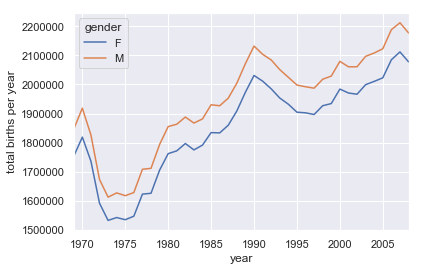

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # Используем стили библиотеки Seaborn
births.pivot_table('births', index='year', columns='gender',
 aggfunc='sum').plot()
plt.ylabel('total births per year'); 
# общее количество новорожденных в течение года

Благодаря сводной таблице и методу plot() мы можем сразу же увидеть ежегодный
тренд новорожденных по полу. 

В последние 50 с лишним лет мальчиков рождалось больше, чем девочек, примерно на 5%.

Дальнейшее исследование данных. 

Хотя это, возможно, и не имеет отношения к сводным таблицам, есть еще несколько интересных вещей, которые можно извлечь из этого набора данных с помощью уже рассмотренных инструментов библиотеки Pandas. 

Нам придется начать с небольшой очистки данных, удалив аномальные значения, возникшие из-за неправильно набранных дат (например, 31 июня) или отсутствующих значений (например, 99 июня). 

Простой способ убрать сразу их все — отсечь аномальные значения. 

Мы сделаем это с помощью надежного алгоритма сигма-отсечения (sigma-clipping):

https://ru.wikipedia.org/wiki/%D0%9A%D0%B2%D0%B0%D0%BD%D1%82%D0%B8%D0%BB%D1%8C

In [38]:
np.percentile(births['births'], [0, 50, 75])

array([3249., 4812., 5259.])

In [39]:
births['births']

0        4046
1        4440
2        4454
3        4548
4        4548
5        4994
6        4440
7        4520
8        4192
9        4198
10       4710
11       4850
12       4646
13       5092
14       4800
15       4934
16       4592
17       4842
18       4852
19       5190
20       4580
21       4598
22       4126
23       4324
24       4758
25       5076
26       5070
27       5296
28       4798
29       5096
         ... 
15037    4270
15038    4486
15039    4211
15040    4220
15041    5651
15042    6065
15043    6092
15044    6343
15045    5462
15046    5861
15047    5219
15048    5510
15049    4887
15050    5110
15051    4024
15052    4269
15053    3874
15054    3961
15055    4274
15056    4409
15057    5633
15058    5895
15059    5858
15060    5989
15061    5760
15062    5944
15063    5742
15064    6095
15065    4435
15066    4698
Name: births, Length: 14610, dtype: int64

In [31]:
quartiles = np.percentile(births['births'], [25, 50, 75])
print(quartiles)
mu = quartiles[1]
print(mu)
sig = 0.74 * (quartiles[2] - quartiles[0])
print(sig)

[4383. 4812. 5259.]
4812.0
648.24


Последняя строка представляет собой грубую оценку среднего значения выборки,
в котором 0.74 — межквартильный размах Гауссового распределения. 

Теперь можно воспользоваться методом query() (обсуждаемым далее в разделе «Увеличение производительности библиотеки Pandas: eval() и query()» этой главы) для фильтрации строк, в которых количество новорожденных выходит за пределы этих значений:

In [42]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


Далее мы устанавливаем целочисленный тип столбца для day. 

Ранее он был строчным, поскольку некоторые столбцы в наборе данных содержат значение 'null':

In [43]:
# делаем тип столбца 'day' целочисленным;
# изначально он был строчным из-за пустых значений
births['day'] = births['day'].astype(int)

Наконец, мы можем создать индекс для даты, объединив день, месяц и год (см.«Работа с временными рядами» этой главы). 

Это даст нам возможность быстро вычислять день недели для каждой строки:

In [49]:
# создаем индекс для даты из года, месяца и дня
births.index = pd.to_datetime(10000 * births.year + 
                              100 * births.month + 
                              births.day, format='%Y%m%d')
print(births.index)
births['dayofweek'] = births.index.dayofweek # День недели
print('----------------------')
births['dayofweek'].head()

DatetimeIndex(['1969-01-01', '1969-01-01', '1969-01-02', '1969-01-02',
               '1969-01-03', '1969-01-03', '1969-01-04', '1969-01-04',
               '1969-01-05', '1969-01-05',
               ...
               '1988-12-27', '1988-12-27', '1988-12-28', '1988-12-28',
               '1988-12-29', '1988-12-29', '1988-12-30', '1988-12-30',
               '1988-12-31', '1988-12-31'],
              dtype='datetime64[ns]', length=14610, freq=None)
----------------------


1969-01-01    2
1969-01-01    2
1969-01-02    3
1969-01-02    3
1969-01-03    4
Name: dayofweek, dtype: int64

C помощью этого можно построить график дней рождения в зависимости от дня недели за несколько десятилетий (рис. 3.3):

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gca.html

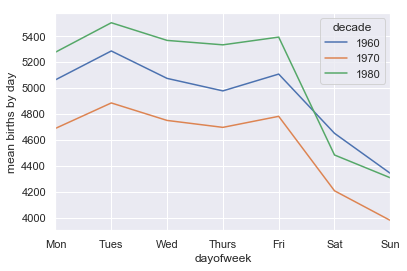

In [50]:
import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table('births', index='dayofweek',
 columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
'Sun'])
plt.ylabel('mean births by day'); # среднее количество новорожденных в день


Становится очевидно, что в выходные происходит меньше рождений, чем в будние дни! 

Обратите внимание, что 1990-е и 2000-е годы отсутствуют на графике,
поскольку начиная с 1989 года данные CDC содержат только месяц рождения.

Еще одно интересное представление этих данных можно получить, построив график рождений в зависимости от дня года. 

Сначала сгруппируем данные отдельно по месяцу и дню:

In [62]:
births_by_date = births.pivot_table('births',
 [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

Результат представляет собой мультииндекс по месяцам и дням. 

Чтобы упростить построение графика, преобразуем эти месяцы и дни в даты путем связывания их с фиктивным годом (обязательно выберите високосный год, чтобы обработать 29 февраля корректным образом!).


In [63]:
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date.head()



,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


Если смотреть только на месяц и день, то мы получаем временной ряд, отражающий среднее количество новорожденных в зависимости от дня года. Исходя из
этого, мы можем построить с помощью метода plot график данных (рис. 3.4). В нем
мы обнаруживаем некоторые любопытные тренды:

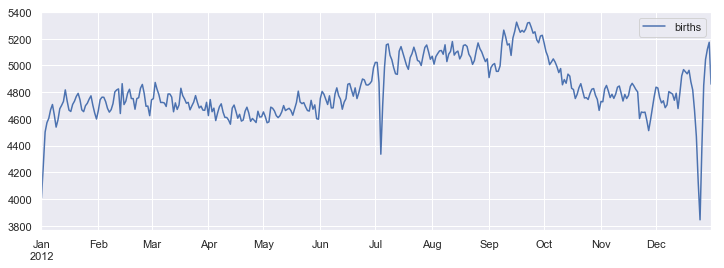

In [64]:
 # Строим график результатов
 fig, ax = plt.subplots(figsize=(12, 4))
 births_by_date.plot(ax=ax);

В частности, на графике удивляет резкое падение количества рождений в государственные праздники США (например, День независимости, День труда, День
благодарения, Рождество, Новый год). 

Хотя оно отражает скорее тенденции, относящиеся к заранее запланированным/искусственным родам, а не глубокое психосоматическое влияние на естественные роды. 

Дальнейшее обсуждение данной тенденции, ее анализ и ссылки на эту тему смотрите в сообщении по адресу http://bit.ly/2fZzW8K из блога Эндрю Гелмана. 

Мы вернемся к этому графику в подразделе «Пример: влияние выходных на рождения детей в США» раздела «Текст и поясняющие надписи» главы 4, в котором воспользуемся инструментами библиотеки Matplotlib для добавления меток на график.

Глядя на этот краткий пример, вы могли заметить, что многие из рассмотренных
нами инструментов языка Python и библиотеки Pandas можно комбинировать
между собой и использовать, чтобы почерпнуть полезную информацию из множества наборов данных. Более сложные манипуляции над данными мы увидим
в следующих разделах.

# Векторизованные операции над строками

Одна из сильных сторон языка Python — относительное удобство работы в нем со строковыми данными и манипуляций ими. 

Библиотека Pandas вносит в это свою лепту и предоставляет набор векторизованных операций над строками, ставших
существенной частью очистки данных, необходимой при работе с реальными данными. 

В этом разделе мы изучим некоторые строковые операции библиотеки Pandas, после чего рассмотрим их использование для частичной очистки очень зашумленного набора данных рецептов, собранных в Интернете.


### Знакомство со строковыми операциями библиотеки Pandas


В предыдущем разделе мы видели, как обобщают арифметические операции такие инструменты, как библиотека NumPy и библиотека Pandas, позволяя легко и быстро выполнять одну и ту же операцию над множеством элементов массива.

Например:

In [1]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

Векторизация операций упрощает синтаксис работы с массивами данных: больше нет необходимости беспокоиться о размере или форме массива, а только о нужной нам операции. 

Библиотека NumPy не предоставляет такого простого способа
доступа для массивов строк, так что приходится использовать более длинный синтаксис циклов:

In [2]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

Вероятно, для работы с некоторыми данными этого достаточно, но при наличии отсутствующих значений все портится. 

Например:

In [3]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]


AttributeError: 'NoneType' object has no attribute 'capitalize'

Библиотека Pandas включает средства как для работы с векторизованными строковыми операциями, так и для корректной обработки отсутствующих значений
посредством атрибута str объектов Series библиотеки Pandas и содержащих строки объектов Index. 

Так, допустим, мы создали объект Series библиотеки Pandas
с теми же данными:

In [4]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

Теперь можно вызвать один-единственный метод для преобразования строчных букв в заглавные, который будет игнорировать любые отсутствующие значения:

In [5]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

С помощью Tab-автодополнения для этого атрибута str можно получить список всех векторизованных строковых методов, доступных в библиотеке Pandas.

In [ ]:
#курсор вконце, нажать Tab для просмотра строковых методов
names.str.

### Таблицы методов работы со строками библиотеки Pandas

Если вы хорошо разбираетесь в манипуляции строковыми данными в языке Python, львиная доля синтаксиса работы со строками библиотеки Pandas будет вам интуитивно понятна настолько, что достаточно, наверное, просто привести таблицу имеющихся методов. 

С этого и начнем, прежде чем углубимся в некоторые нюансы.

Примеры в этом разделе используют следующий ряд имен:

In [6]:
monte = pd.Series(['Graham Chapman', 
                   'John Cleese', 
                   'Terry Gilliam',
                   'Eric Idle', 
                   'Terry Jones', 
                   'Michael Palin'])

### Методы, аналогичные строковым методам языка Python

Практически для всех встроенных строковых методов Python есть соответствующий векторизованный строковый метод библиотеки Pandas. 

Вот список методов атрибута str библиотеки Pandas, дублирующий строковые методы языка Python:


len() lower() translate() islower()
ljust() upper() startswith() isupper()
rjust() find() endswith() isnumeric()
center() rfind() isalnum() isdecimal()
zfill() index() isalpha() split()
strip() rindex() isdigit() rsplit()
rstrip() capitalize() isspace() partition()
lstrip() swapcase() istitle() rpartition()

Обратите внимание, что возвращаемые значения у них отличаются. 

Некоторые, например lower(), возвращают Series строк:

In [7]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

Часть других возвращает числовые значения:

In [8]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

Или булевы значения:

In [9]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

Или списки и другие составные значения для каждого элемента:

In [10]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

Мы увидим манипуляции над подобными объектами типа «ряды списков», когда продолжим обсуждение.

### Методы, использующие регулярные выражения

Помимо этого, существует и несколько методов, принимающих на входе регулярные выражения для проверки содержимого каждого из строковых элементов и следующих некоторым соглашениям по API встроенного модуля re языка Python
(табл. 3.4).

##### Соответствие между методами библиотеки Pandas и функциями модуля re языка Python

Метод            Описание

match()          Вызывает функцию re.match() для каждого элемента, возвращая    
                 булево значение
                 
extract()        Вызывает функцию re.match() для каждого элемента, возвращая 
                 подходящие группы в виде строк
                 
findall()        Вызывает функцию re.findall() для каждого элемента

replace()        Заменяет вхождения шаблона какой-либо другой строкой

contains()       Вызывает функцию re.search() для каждого элемента, возвращая  
                 булево значение
                 
count()          Подсчитывает вхождения шаблона

split()          Эквивалент функции str.split(), но принимающий на входе   
                 регулярные выражения
                 
rsplit()         Эквивалент функции str.rsplit(), но принимающий на входе  
                 регулярные выражения

In [12]:
s = 'it is my new task'
s.split()

['it', 'is', 'my', 'new', 'task']

In [13]:
s.rsplit()

['it', 'is', 'my', 'new', 'task']

In [14]:
s.split(maxsplit=2)

['it', 'is', 'my new task']

In [15]:
s.rsplit(maxsplit=2)

['it is my', 'new', 'task']

C помощью этих функций можно выполнять массу интересных операций. Например, можно извлечь имя из каждого элемента, выполнив поиск непрерывной
группы символов в начале каждого из них:

In [16]:
monte.str.extract('([A-Za-z]+)')


,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


Или, например, найти все имена, начинающиеся и заканчивающиеся согласным звуком, воспользовавшись символами регулярных выражений «начало строки» (^)
и «конец строки» ($):

In [17]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

Такой сжатый синтаксис регулярных выражений для записей объектов Series и DataFrame открывает массу возможностей для анализа и очистки данных.

##### Прочие методы

Наконец, существуют и прочие методы, пригодные для разных удобных операций
(табл. 3.5).

Метод           Описание

get()           Индексирует все элементы

slice()         Вырезает подстроку из каждого элемента

slice_replace() Заменяет в каждом элементе вырезанную подстроку заданным     
                значением
                
cat()           Конкатенация строк

repeat()        Повторяет значения (указанное число раз)

normalize()     Возвращает версию строки в кодировке Unicode

pad()           Добавляет пробелы слева, справа или с обеих сторон строки

wrap()          Разбивает длинные строковые значения на строки длины, не 
                превышающей заданную
                
join()          Объединяет строки из всех элементов с использованием заданного 
                разделителя
                
get_dummies()   Извлекает значения переменных-индикаторов в виде объекта   
                DataFrame

##### Векторизованный доступ к элементам и вырезание подстрок. 

Операции get() и slice(), в частности, предоставляют возможность векторизованного доступа к элементам из каждого массива. 

Например, можно вырезать первые три символа из каждого массива посредством выражения str.slice(0, 3). 

Обратите внимание, что такая возможность доступна и с помощью обычного синтаксиса индексации языка Python, например, df.str.slice(0, 3) эквивалентно
df.str[0:3]:

In [21]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [22]:
monte.str.slice(0, 3)

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [23]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

Индексация посредством df.str.get(i) и df.str[i]происходит аналогично.


Эти методы get() и slice() также дают возможность обращаться к элементам возвращаемых методом split() массивов. 

Например, для извлечения фамилии из каждой записи можно использовать вместе методы split() и get():

In [24]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

###### Индикаторные переменные.

Еще один метод, требующий некоторых дополнительных пояснений, — get_dummies(). 

Удобно, когда в данных имеется столбец,
содержащий кодированный индикатор. 

Например, у нас есть набор данных, содержащий информацию в виде кодов, таких как A="родился в США", B="родился
в Великобритании", C="любит сыр", D="любит мясные консервы":

In [25]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 
                                    'B|D', 
                                    'A|C', 
                                    'B|D', 
                                    'B|C',
                                    'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


Метод get_dummies() дает возможность быстро разбить все индикаторные переменные, преобразовав их в объект DataFrame:

In [26]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


Используя эти операции как «строительные блоки», можно создать бесчисленное множество обрабатывающих строки процедур для очистки данных.

Мы не будем углубляться в эти методы, но я рекомендую прочитать раздел Working with Text Data («Работа с текстовыми данными») из онлайн-документации библиотеки Pandas (http://pandas.pydata.org/pandas-docs/stable/text.html) или заглянуть в раздел «Дополнительные источники информации» данной главы.

### Пример: база данных рецептов

Описанные векторизованные строковые операции оказываются наиболее полезными при очистке сильно зашумленных реальных данных. 

Здесь мы рассмотрим пример такой очистки, воспользовавшись полученной из множества различных
интернет-источников базой данных рецептов. 

Наша цель — разбор рецептов на списки ингредиентов, чтобы можно было быстро найти рецепт, исходя из имеющихся
в распоряжении ингредиентов.

Используемые для компиляции сценарии можно найти по адресу https://github.com/ fictivekin/openrecipes, как и ссылку на актуальную версию базы.

По состоянию на весну 2016 года размер базы данных составляет около 30 Мбайт, ее можно скачать и разархивировать с помощью следующих команд:

In [28]:
!curl -O http://openrecipes.s3.amazonaws.com/20131812-recipeitems.json.gz
!gunzip 20131812-recipeitems.json.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   243    0   243    0     0    486      0 --:--:-- --:--:-- --:--:--   486
"gunzip" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


База данных находится в формате JSON, так что можно попробовать воспользоваться функцией pd.read_json для ее чтения:

In [29]:
try:
    recipes = pd.read_json('recipeitems-latest.json')
except ValueError as e:
    print("ValueError:", e)


ValueError: Trailing data


Упс! Мы получили ошибку ValueError с упоминанием наличия «хвостовых данных». 

Если поискать эту ошибку в Интернете, складывается впечатление, что она появляется из-за использования файла, в котором каждая строка сама по себе
является корректным JSON, а весь файл в целом — нет. 

Рассмотрим, справедливо ли это объяснение:

In [30]:
with open('recipeitems-latest.json') as f:
    line = f.readline()
pd.read_json(line).shape


(2, 12)

In [31]:
line

'{ "_id" : { "$oid" : "5160756b96cc62079cc2db15" }, "name" : "Drop Biscuits and Sausage Gravy", "ingredients" : "Biscuits\\n3 cups All-purpose Flour\\n2 Tablespoons Baking Powder\\n1/2 teaspoon Salt\\n1-1/2 stick (3/4 Cup) Cold Butter, Cut Into Pieces\\n1-1/4 cup Butermilk\\n SAUSAGE GRAVY\\n1 pound Breakfast Sausage, Hot Or Mild\\n1/3 cup All-purpose Flour\\n4 cups Whole Milk\\n1/2 teaspoon Seasoned Salt\\n2 teaspoons Black Pepper, More To Taste", "url" : "http://thepioneerwoman.com/cooking/2013/03/drop-biscuits-and-sausage-gravy/", "image" : "http://static.thepioneerwoman.com/cooking/files/2013/03/bisgrav.jpg", "ts" : { "$date" : 1365276011104 }, "cookTime" : "PT30M", "source" : "thepioneerwoman", "recipeYield" : "12", "datePublished" : "2013-03-11", "prepTime" : "PT10M", "description" : "Late Saturday afternoon, after Marlboro Man had returned home with the soccer-playing girls, and I had returned home with the..." }\n'

In [32]:
pd.read_json(line)

,_id,name,ingredients,url,image,ts,cookTime,source,recipeYield,datePublished,prepTime,description
$date,NaN,Drop Biscuits and Sausage Gravy,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...,1.365276e+12,PT30M,thepioneerwoman,12,2013-03-11,PT10M,"Late Saturday afternoon, after Marlboro Man ha..."
$oid,5160756b96cc62079cc2db15,Drop Biscuits and Sausage Gravy,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...,NaN,PT30M,thepioneerwoman,12,2013-03-11,PT10M,"Late Saturday afternoon, after Marlboro Man ha..."


Да, очевидно, каждая строка — корректный JSON, так что нам нужно соединить их все воедино. 

Один из способов сделать это — фактически сформировать строковое представление, содержащее все записи JSON, после чего загрузить все с помощью pd.read_json:

In [34]:
# Читаем весь файл в массив Python
with open('recipeitems-latest.json', 'r', encoding='utf-8') as f:
    # Извлекаем каждую строку
    data = (line.strip() for line in f)
    # Преобразуем так, чтобы каждая строка была элементом списка
    data_json = "[{0}]".format(','.join(data))
# Читаем результат в виде JSON
recipes = pd.read_json(data_json)

In [35]:
recipes.shape

(173278, 17)

Видим, что здесь почти 200 тысяч рецептов и 17 столбцов. Посмотрим на одну из строк, чтобы понять, что мы получили:

In [36]:
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
cookTime                                                          PT30M
creator                                                             NaN
dateModified                                                        NaN
datePublished                                                2013-03-11
description           Late Saturday afternoon, after Marlboro Man ha...
image                 http://static.thepioneerwoman.com/cooking/file...
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
name                                    Drop Biscuits and Sausage Gravy
prepTime                                                          PT10M
recipeCategory                                                      NaN
recipeInstructions                                                  NaN
recipeYield                                                          12
source                                                  thepione

Здесь содержится немало информации, но большая ее часть находится в беспорядочном виде, как это обычно и бывает со взятыми из Интернета данными.

В частности, список ингредиентов находится в строковом формате и нам придется аккуратно извлечь оттуда интересующую нас информацию. 

Начнем с того, что взглянем поближе на ингредиенты:

In [37]:
recipes.ingredients.str.len().describe()

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

Средняя длина списка ингредиентов составляет 250 символов при минимальной длине 0 и максимальной — почти 10 000 символов!

Из любопытства посмотрим, у какого рецепта самый длинный список ингредиентов:


In [38]:
recipes.name[np.argmax(recipes.ingredients.str.len())]

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

Этот рецепт явно выглядит не очень простым.

Можно сделать и другие открытия на основе сводных показателей. 

Например, посмотрим, сколько рецептов описывают еду, предназначенную для завтрака:

In [39]:
recipes.description.str.contains('[Bb]reakfast').sum()

3524

Или сколько рецептов содержат корицу (cinnamon) в списке ингредиентов:

In [40]:
recipes.ingredients.str.contains('[Cc]innamon').sum()


10526

Можно даже посмотреть, есть ли рецепты, в которых название этого ингредиента написано с орфографической ошибкой, как cinamon:

In [41]:
recipes.ingredients.str.contains('[Cc]inamon').sum()

11

Такая разновидность обязательного предварительного изучения данных возможна благодаря инструментам по работе со строками библиотеки Pandas. 

Именно в сфере такой очистки данных Python действительно силен.

### Простая рекомендательная система для рецептов

Немного углубимся в этот пример и начнем работу над простой рекомендательной системой для рецептов: по заданному списку ингредиентов необходимо найти
рецепт, использующий их все. 

Концептуально простая, эта задача усложняется
неоднородностью данных: не существует удобной операции, которая позволила бы извлечь из каждой строки очищенный список ингредиентов.

Так что мы немного сжульничаем: начнем со списка распространенных ингредиентов и будем искать, в каждом ли рецепте они содержатся в списке ингредиентов. 

Для упрощения ограничимся травами и специями:

In [42]:
spice_list = ['salt', 'pepper', 
              'oregano', 'sage', 
              'parsley', 'rosemary', 
              'tarragon', 'thyme', 
              'paprika', 'cumin']


Мы можем создать булев объект DataFrame, состоящий из значений True и False, указывающих, содержится ли данный ингредиент в списке:

In [43]:
import re
spice_df = pd.DataFrame(dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE)) 
                             for spice in spice_list))
spice_df.head()

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


Теперь в качестве примера допустим, что мы хотели бы найти рецепт, в котором используются петрушка (parsley), паприка (paprika) и эстрагон (tarragon). 

Это можно сделать очень быстро, воспользовавшись методом query() объекта DataFrame, который мы обсудим подробнее в разделе «Увеличение производительности библиотеки Pandas: eval() и query()» данной главы:

In [44]:
selection = spice_df.query('parsley & paprika & tarragon')
len(selection)

10

Мы нашли всего десять рецептов с таким сочетанием ингредиентов. 

Воспользуемся возвращаемым этой выборкой индексом, чтобы выяснить названия этих рецептов:

In [45]:
recipes.name[selection.index]


2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object

Теперь, сократив наш список рецептов почти в 20 000 раз, мы можем принять более взвешенное решение: что готовить на обед.

##### Дальнейшая работа с рецептами

Надеемся, что этот пример позволил вам попробовать на вкус (па-ба-ба-бам!) операции по очистке данных, которые хорошо выполняются с помощью строковых методов библиотеки Pandas. 

Создание надежной рекомендательной системы для
рецептов потребовало бы намного больше труда! 

Важной частью этой задачи было бы извлечение из каждого рецепта полного списка ингредиентов. 

К сожалению, разнообразие используемых форматов делает этот процесс весьма трудоемким.

Как подсказывает нам Капитан Очевидность, в науке о данных очистка поступивших из реального мира данных часто представляет собой основную часть работы,
и библиотека Pandas предоставляет инструменты для эффективного выполнения этой задачи.

# Работа с временными рядами

Библиотека Pandas была разработана в расчете на построение финансовых моделей, так что, как вы могли и ожидать, она содержит весьма широкий набор инструментов для работы с датой, временем и индексированными по времени данными. 

Данные о дате и времени могут находиться в нескольких видах, которые мы сейчас обсудим.

Метки даты/времени ссылаются на конкретные моменты времени (например, 4 июля 2015 года в 07:00 утра).

 Временные интервалы и периоды ссылаются на отрезки времени между конкретными начальной и конечной точками (например, 2015 год). 
Периоды обычно представляют собой особый случай интервалов, с непересекающимися интервалами одинаковой длительности (например, 24-часовые периоды времени,
составляющие сутки).

 Временная дельта (она же продолжительность) относится к отрезку времени конкретной длительности (например, 22,56 с).

В данном разделе мы расскажем, как работать с каждым из этих типов временных данных в библиотеке Pandas. 

Короткий раздел никоим образом не претендует на
звание исчерпывающего руководства по имеющимся в Python или библиотеке Pandas инструментам работы с временными рядами. 

Он представляет собой обзор работы с временными рядами в общих чертах. 

Мы начнем с краткого обсуждения инструментов для работы с датой и временем в языке Python, прежде чем перейти
непосредственно к обсуждению инструментов библиотеки Pandas. 

После перечисления источников углубленной информации мы рассмотрим несколько кратких примеров работы с данными временных рядов в библиотеке Pandas.

## Дата и время в языке Python

В мире языка Python существует немало представлений дат, времени, временных дельт и интервалов времени. 

Хотя для приложений науки о данных наиболее удобны инструменты работы с временными рядами библиотеки Pandas, не помешает посмотреть на другие используемые в Python пакеты.

### Нативные даты и время языка Python: пакеты datetime и dateutil

Базовые объекты Python для работы с датами и временем располагаются во встроенном пакете datetime. 

Его, вместе со сторонним модулем dateutil, можно использовать для быстрого выполнения множества удобных операций над датами и временем. 

Например, можно вручную сформировать дату с помощью типа datetime:


In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

Или, воспользовавшись модулем dateutil, можно выполнять синтаксический разбор дат, находящихся во множестве строковых форматов:

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
date = parser.parse("4 of July 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [4]:
date = parser.parse("4.07.15")
date

datetime.datetime(2015, 4, 7, 0, 0)

In [5]:
parser.parse("2012.10.02")

datetime.datetime(2012, 10, 2, 0, 0)

In [6]:
parser.parse("4.1.2012").day

1

In [7]:
parser.parse("4.1.2012").month

4

При наличии объекта datetime можно делать вывод дня недели:

In [ ]:
date.strftime('%A')